# Efficiency, Explainability and Environmental Sustainability in Wastewater Treatment: A Machine Learning-Based Approach to Cost Management and Effluent Quality

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization
import seaborn as sns

In [35]:
# read the hourly data
df_hourly = pd.read_csv('data/df_hourly.csv')

In [6]:
df_hourly.head()

t           Qi          T        CODi       NH4i        TNi  \
0  0.015625  14406.28225  19.737112  614.746915  19.151799  44.068632   
1  0.057292  12837.01100  19.618762  584.179823  16.709277  40.653262   
2  0.098958  11749.33225  19.491398  528.349775  14.732324  36.651249   
3  0.140625  10914.30350  19.363810  482.648807  14.911990  35.107291   
4  0.182292  10515.67700  19.244801  446.465233  14.049397  32.696661   

         TSSi       TPi      Qintr         Qr  ...       TNo       TSSo  \
0  355.109175  8.031241  48134.831  25411.192  ...  8.558629  12.121001   
1  341.804230  8.819089  48134.831  25411.192  ...  8.591077  11.486679   
2  311.960990  8.262622  48134.831  25411.192  ...  8.602270  11.144210   
3  286.976783  7.929862  48134.831  25411.192  ...  8.565928  10.953440   
4  263.812485  7.311440  48134.831  25411.192  ...  8.474410  10.839923   

        TPo          EQI           SC           AE          PE           ME  \
0  1.113214  6677.886750  12132.98000  3933.728500  864.843970  5481.689250   
1  1.034620  6464.858700  11993.34150  3545.029650  864.827172  5485.683575   
2  0.989105  6344.323675  11878.62725  3246.704825  864.815327  5489.732950   
3  0.969153  6281.458800  11783.81600  3039.385450  864.807775  5492.915875   
4  0.971374  6260.303300  11648.92400  2884.520650  864.797603  5493.965150   

           OCI  EQI_original  
0  18422.37825   4605.147088  
1  17890.02975   3969.606172  
2  17472.92975   3564.484951  
3  17167.60850   3277.822528  
4  16876.79250   3145.719067  

[5 rows x 32 columns]

In [36]:
df_hourly.drop(columns=['t', 'EQI'], inplace=True)

In [37]:
df_delay_XX_hours = df_hourly
df_delay_XX_hours.rename(columns={'EQI_original': 'EQI'}, inplace=True)
df_delay_XX_hours

Qi          T        CODi       NH4i        TNi        TSSi  \
0     14406.28225  19.737112  614.746915  19.151799  44.068632  355.109175   
1     12837.01100  19.618762  584.179823  16.709277  40.653262  341.804230   
2     11749.33225  19.491398  528.349775  14.732324  36.651249  311.960990   
3     10914.30350  19.363810  482.648807  14.911990  35.107291  286.976783   
4     10515.67700  19.244801  446.465233  14.049397  32.696661  263.812485   
...           ...        ...         ...        ...        ...         ...   
8731  22280.07700  19.957798  716.726378  28.802786  57.082764  398.481652   
8732  22516.32750  19.977234  680.968467  25.881294  53.193089  387.179222   
8733  18464.83700  19.962686  718.497793  26.427896  55.284096  410.219975   
8734  15457.20550  19.915253  722.257912  25.630474  54.933458  420.928455   
8735  12752.08675  19.838277  734.213555  26.293611  56.340237  435.410085   

            TPi      Qintr         Qr         Qw  ...      NH4o        TNo  \
0      8.031241  48134.831  25411.192  476.45151  ...  0.133928   8.558629   
1      8.819089  48134.831  25411.192  476.45151  ...  0.132271   8.591077   
2      8.262622  48134.831  25411.192  476.45151  ...  0.129067   8.602270   
3      7.929862  48134.831  25411.192  476.45151  ...  0.124853   8.565928   
4      7.311440  48134.831  25411.192  476.45151  ...  0.120406   8.474410   
...         ...        ...        ...        ...  ...       ...        ...   
8731  13.291094  66247.012  28275.330  614.56807  ...  0.135538  10.007595   
8732  12.271937  66247.012  28275.330  614.56807  ...  0.133387   9.735007   
8733  12.952948  66247.012  28275.330  614.56807  ...  0.139391   9.511714   
8734  12.654632  66247.012  28275.330  614.56807  ...  0.146743   9.396183   
8735  12.397743  66247.012  28275.330  614.56807  ...  0.150556   9.346759   

           TSSo       TPo           SC           AE           PE           ME  \
0     12.121001  1.113214  12132.98000  3933.728500   864.843970  5481.689250   
1     11.486679  1.034620  11993.34150  3545.029650   864.827172  5485.683575   
2     11.144210  0.989105  11878.62725  3246.704825   864.815327  5489.732950   
3     10.953440  0.969153  11783.81600  3039.385450   864.807775  5492.915875   
4     10.839923  0.971374  11648.92400  2884.520650   864.797603  5493.965150   
...         ...       ...          ...          ...          ...          ...   
8731  13.543696  1.437180  13157.64025  4712.625150  1069.910475  5705.004650   
8732  14.021078  1.444248  13306.95500  5035.466825  1069.924875  5698.191475   
8733  13.255109  1.372332  13336.80125  4929.957425  1069.925675  5699.386225   
8734  12.209047  1.265232  13216.13400  4483.583075  1069.908850  5702.092900   
8735  11.366836  1.172268  13047.08275  3998.193425  1069.886750  5708.741650   

              OCI          EQI  
0     18422.37825  4605.147088  
1     17890.02975  3969.606172  
2     17472.92975  3564.484951  
3     17167.60850  3277.822528  
4     16876.79250  3145.719067  
...           ...          ...  
8731  20292.58775  8311.408718  
8732  20771.57200  8411.718742  
8733  20694.71450  6670.274914  
8734  20124.94950  5329.429387  
8735  19463.83775  4222.267004  

[8736 rows x 30 columns]

In [38]:
list_hours_shifted = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15']
fname_prefix = 'data/df_delay_'
fname_postfix='_hours_result_sim2.pkl'

# read the hourly data

for ii in list_hours_shifted:
    file_name = [fname_prefix + ii + fname_postfix]
    print(file_name)
    
    file_name = df_delay_XX_hours.copy(deep=True)
    file_name = df_delay_XX_hours.copy(deep=True)
    list_names = list(df_delay_XX_hours.columns)
    
    
    list_names = list(df_delay_XX_hours.columns)
    for kk in range(1,int(ii)+1):

        shift_no = str(kk)
        df_shift = df_delay_XX_hours.shift(kk)

        # Rename shifted columns
        list_names_new = list(df_delay_XX_hours.columns)
        #print(ii, len(list_names_new))
        iter = len(list_names_new)
        for jj in range(0,iter):
            list_names_new[jj] = list_names[jj]+shift_no
                #print(list_names_new[jj])
            #print(ii, len(list_names))
        df_shift.columns = list_names_new

            # concatenate the shifted inputs
        file_name = pd.concat([file_name, df_shift], axis=1)
        
        
    file_name.dropna(inplace=True)
    file_name.to_pickle(fname_prefix + ii + fname_postfix)

['data/df_delay_1_hours_result_sim2.pkl']
['data/df_delay_2_hours_result_sim2.pkl']
['data/df_delay_3_hours_result_sim2.pkl']
['data/df_delay_4_hours_result_sim2.pkl']
['data/df_delay_5_hours_result_sim2.pkl']
['data/df_delay_6_hours_result_sim2.pkl']
['data/df_delay_7_hours_result_sim2.pkl']
['data/df_delay_8_hours_result_sim2.pkl']
['data/df_delay_9_hours_result_sim2.pkl']
['data/df_delay_10_hours_result_sim2.pkl']
['data/df_delay_11_hours_result_sim2.pkl']
['data/df_delay_12_hours_result_sim2.pkl']
['data/df_delay_13_hours_result_sim2.pkl']
['data/df_delay_14_hours_result_sim2.pkl']
['data/df_delay_15_hours_result_sim2.pkl']


# Bayes optimisation with Random forest

In [114]:
def objective(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestRegressor(n_estimators=int(n_estimators),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  max_features=max_features,  # Fraction, must be <= 1.0
                                  random_state=42,
                                  n_jobs=-1)
    
    return cross_val_score(model, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error").mean()

In [115]:
# Bounds for hyperparameters
param_bounds = {
    'n_estimators': (10, 250),
    'max_depth': (1, 50),
    'min_samples_split': (2, 25),
    'max_features': (0.1, 1.0),
}

In [116]:
# eqi
dfs = []
for kk in list_hours_shifted:
    fname_prefix = 'data/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'

    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    list_col_drop = ['EQI', 'OCI']
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])
    y_ = df_delay_16_hours_result['EQI']


    X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)

    optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
    optimizer.maximize(init_points=5, n_iter=15)
    
    best_params = optimizer.max['params']
    best_params_formatted = {
    'n_estimators': int(best_params['n_estimators']),
    'max_depth': int(best_params['max_depth']),
    'min_samples_split': int(best_params['min_samples_split']),
    'max_features': best_params['max_features']
    }
    
    optimized_rf = RandomForestRegressor(**best_params_formatted, random_state=42, n_jobs=-1)
    optimized_rf.fit(X_train, y_train)
    score = optimized_rf.score(X_test, y_test)
    print(f"Test R^2 Score with Optimized Hyperparameters: {score}")
    
    df = pd.DataFrame.from_dict({
        'kk': kk,
        'r2': score,
        'n_estimators': [int(best_params['n_estimators'])],
        'max_depth': [int(best_params['max_depth'])],
        'min_samples_split': [int(best_params['min_samples_split'])],
        'max_features': [best_params['max_features']]
    })
    print(df)
    dfs.append(df)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -536.6    | 19.35     | 0.9556    | 18.84     | 153.7     |
| 2         | -646.1    | 8.645     | 0.2404    | 3.336     | 217.9     |
| 3         | -498.9    | 30.45     | 0.7373    | 2.473     | 242.8     |
| 4         | -548.3    | 41.79     | 0.2911    | 6.182     | 54.02     |
| 5         | -523.3    | 15.91     | 0.5723    | 11.93     | 79.89     |
| 6         | -519.2    | 14.45     | 0.4539    | 10.92     | 78.85     |
| 7         | -505.6    | 46.8      | 1.0       | 2.0       | 250.0     |
| 8         | -551.0    | 36.16     | 1.0       | 23.56     | 250.0     |
| 9         | -504.3    | 48.57     | 0.9913    | 2.0       | 230.3     |
| 10        | -2.962e+0 | 1.0       | 0.1       | 2.0       | 55.17     |
| 11        | -1.485e+0 | 4.792     | 0.1       | 2.729     | 104.8     |
| 12        | -565.5    | 33.71     | 

In [117]:
df_eqi = pd.concat(dfs)
df_eqi

kk        r2  n_estimators  max_depth  min_samples_split  max_features
0   1  0.988201           242         30                  2      0.737265
0   2  0.988158           242         30                  2      0.737265
0   3  0.986843           229         21                  2      0.895440
0   4  0.988727           242         30                  2      0.737265
0   5  0.987820           242         30                  2      0.737265
0   6  0.987732           242         30                  2      0.737265
0   7  0.989589           242         30                  2      0.737265
0   8  0.989895           242         30                  2      0.737265
0   9  0.990802           242         30                  2      0.737265
0  10  0.990386           234         49                  2      0.768325
0  11  0.991636           242         30                  2      0.737265
0  12  0.990534           231         50                  2      1.000000
0  13  0.990379           242         30                  2      0.737265
0  14  0.990316           223         40                  2      0.881698
0  15  0.991398           242         30                  2      0.737265

In [118]:
# oci
dfs_oci = []
for kk in list_hours_shifted:
    fname_prefix = 'data/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'

    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    list_col_drop = ['EQI', 'OCI']
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])
    y_ = df_delay_16_hours_result['OCI']


    X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)

    optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
    optimizer.maximize(init_points=5, n_iter=15)
    
    best_params = optimizer.max['params']
    best_params_formatted = {
    'n_estimators': int(best_params['n_estimators']),
    'max_depth': int(best_params['max_depth']),
    'min_samples_split': int(best_params['min_samples_split']),
    'max_features': best_params['max_features']
    }
    
    optimized_rf = RandomForestRegressor(**best_params_formatted, random_state=42, n_jobs=-1)
    optimized_rf.fit(X_train, y_train)
    score = optimized_rf.score(X_test, y_test)
    print(f"Test R^2 Score with Optimized Hyperparameters: {score}")
    
    df = pd.DataFrame.from_dict({
        'kk': kk,
        'r2': score,
        'n_estimators': [int(best_params['n_estimators'])],
        'max_depth': [int(best_params['max_depth'])],
        'min_samples_split': [int(best_params['min_samples_split'])],
        'max_features': [best_params['max_features']]
    })
    print(df)
    dfs_oci.append(df)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -363.1    | 19.35     | 0.9556    | 18.84     | 153.7     |
| 2         | -460.1    | 8.645     | 0.2404    | 3.336     | 217.9     |
| 3         | -343.5    | 30.45     | 0.7373    | 2.473     | 242.8     |
| 4         | -395.8    | 41.79     | 0.2911    | 6.182     | 54.02     |
| 5         | -362.7    | 15.91     | 0.5723    | 11.93     | 79.89     |
| 6         | -374.9    | 14.45     | 0.4539    | 10.92     | 78.85     |
| 7         | -345.8    | 36.99     | 0.9257    | 2.028     | 250.0     |
| 8         | -366.3    | 25.81     | 1.0       | 19.25     | 87.79     |
| 9         | -524.2    | 29.79     | 0.1       | 13.4      | 250.0     |
| 10        | -348.8    | 38.41     | 1.0       | 2.0       | 241.7     |
| 11        | -349.0    | 31.3      | 1.0       | 2.0       | 233.0     |
| 12        | -368.5    | 23.8      | 

In [119]:
df_oci = pd.concat(dfs_oci)
df_oci

kk        r2  n_estimators  max_depth  min_samples_split  max_features
0   1  0.971812           242         30                  2      0.737265
0   2  0.970155           242         30                  2      0.737265
0   3  0.969578           242         30                  2      0.737265
0   4  0.969499           242         30                  2      0.737265
0   5  0.969196           242         30                  2      0.737265
0   6  0.968894           242         30                  2      0.737265
0   7  0.968021           242         30                  2      0.737265
0   8  0.967471           242         30                  2      0.737265
0   9  0.967661           242         30                  2      0.737265
0  10  0.967399           225         42                  3      0.801223
0  11  0.966643           242         30                  2      0.737265
0  12  0.966526           242         30                  2      0.737265
0  13  0.966100           242         30                  2      0.737265
0  14  0.965913           242         30                  2      0.737265
0  15  0.965282           242         30                  2      0.737265

kk 1
Test r2 score: 0.9882014176880338
Test r2_adj score: 0.9873927021317669
test rmse: 477.07441883234236


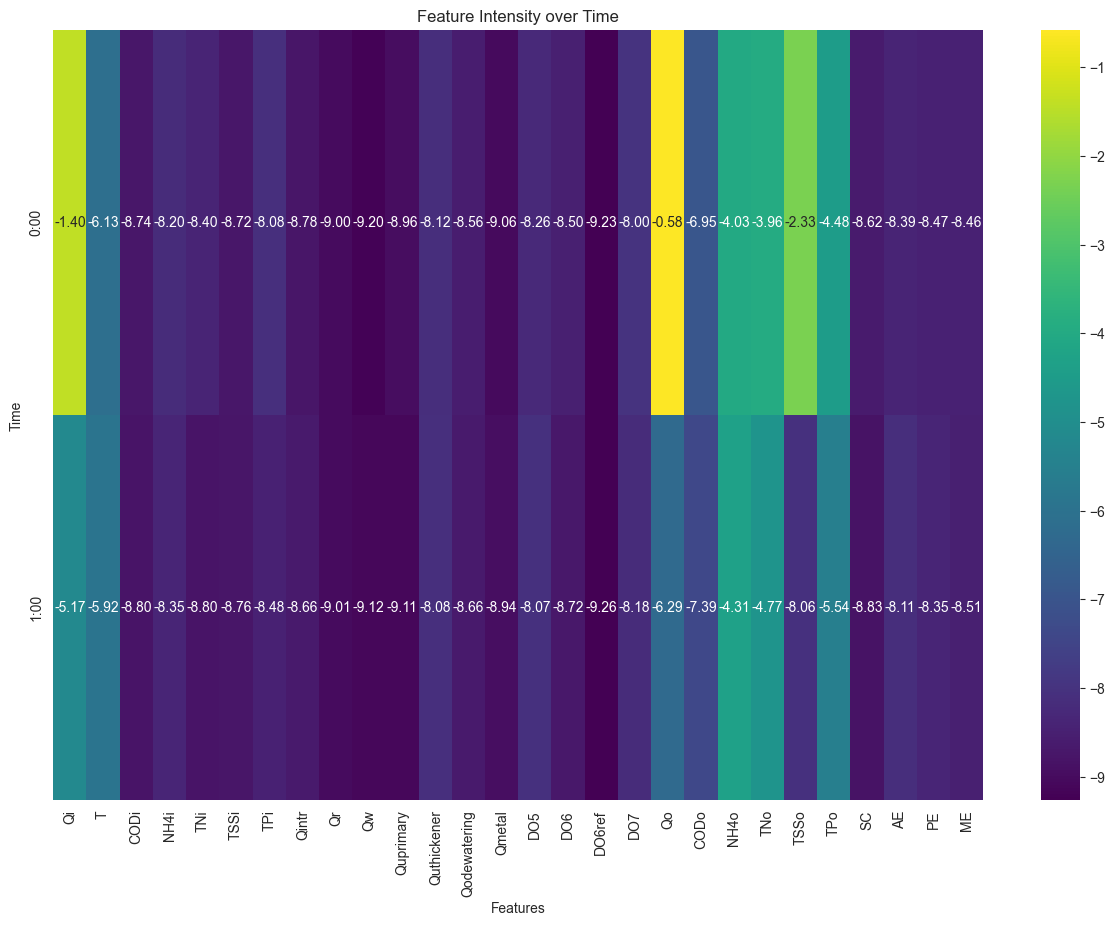

kk 2
Test r2 score: 0.9881581041695354
Test r2_adj score: 0.9868973700126799
test rmse: 477.9493053767346


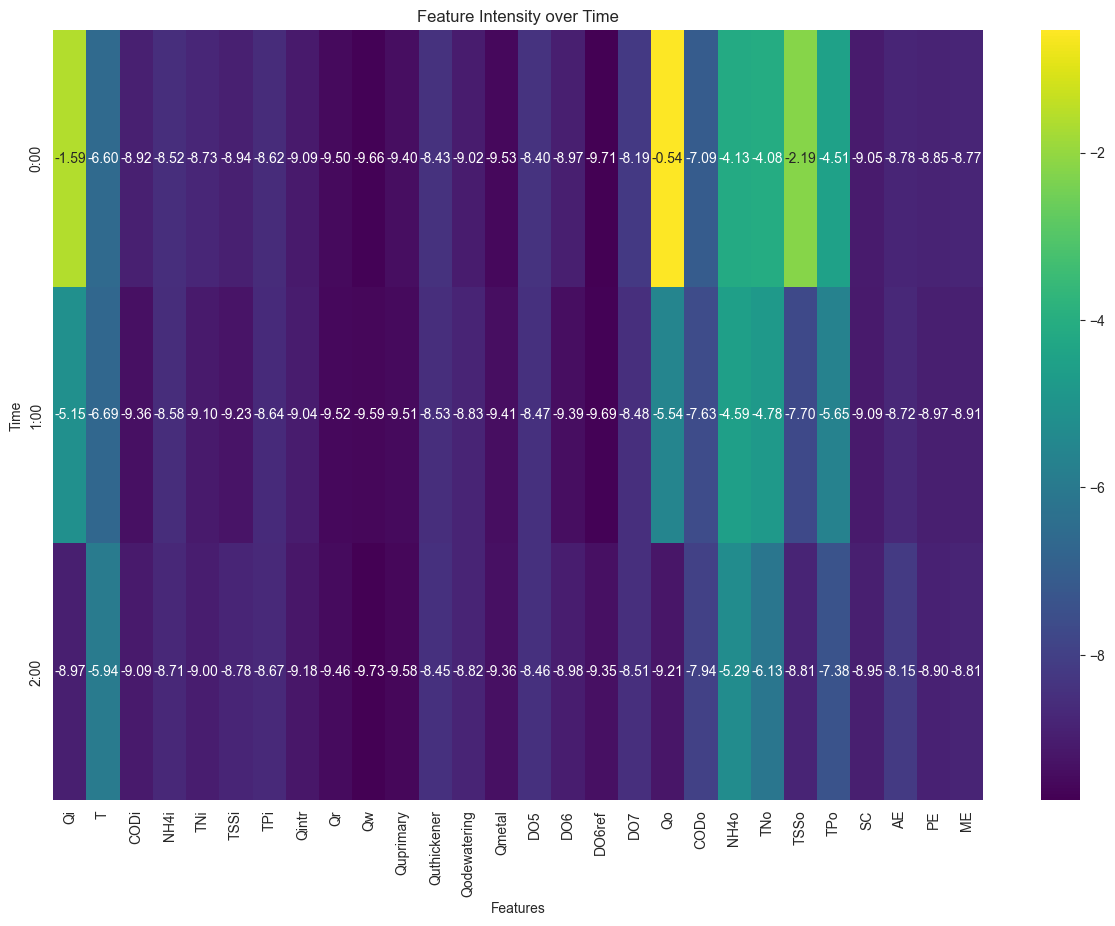

kk 3
Test r2 score: 0.9868429519723108
Test r2_adj score: 0.984906566454438
test rmse: 503.79104850529376


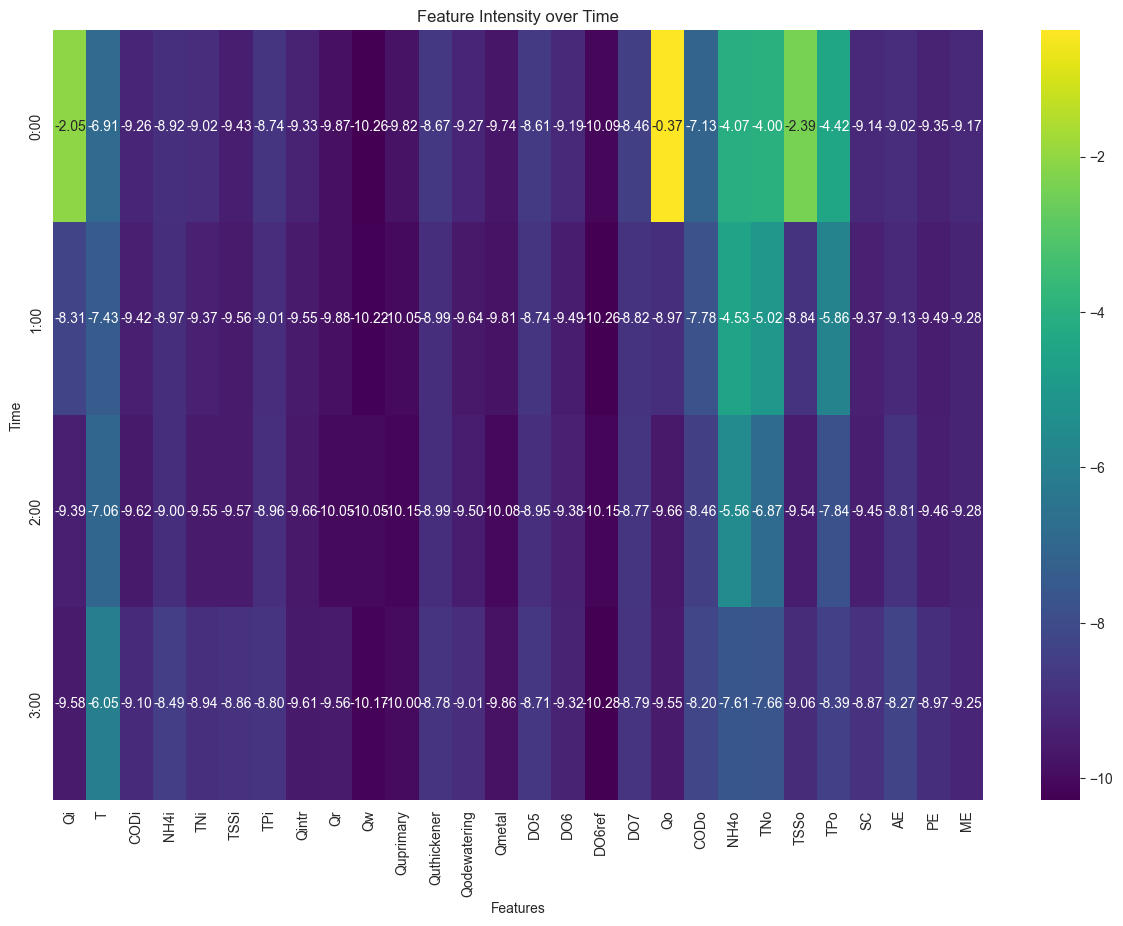

kk 4
Test r2 score: 0.9887266280394797
Test r2_adj score: 0.9865734601343327
test rmse: 466.33513200977194


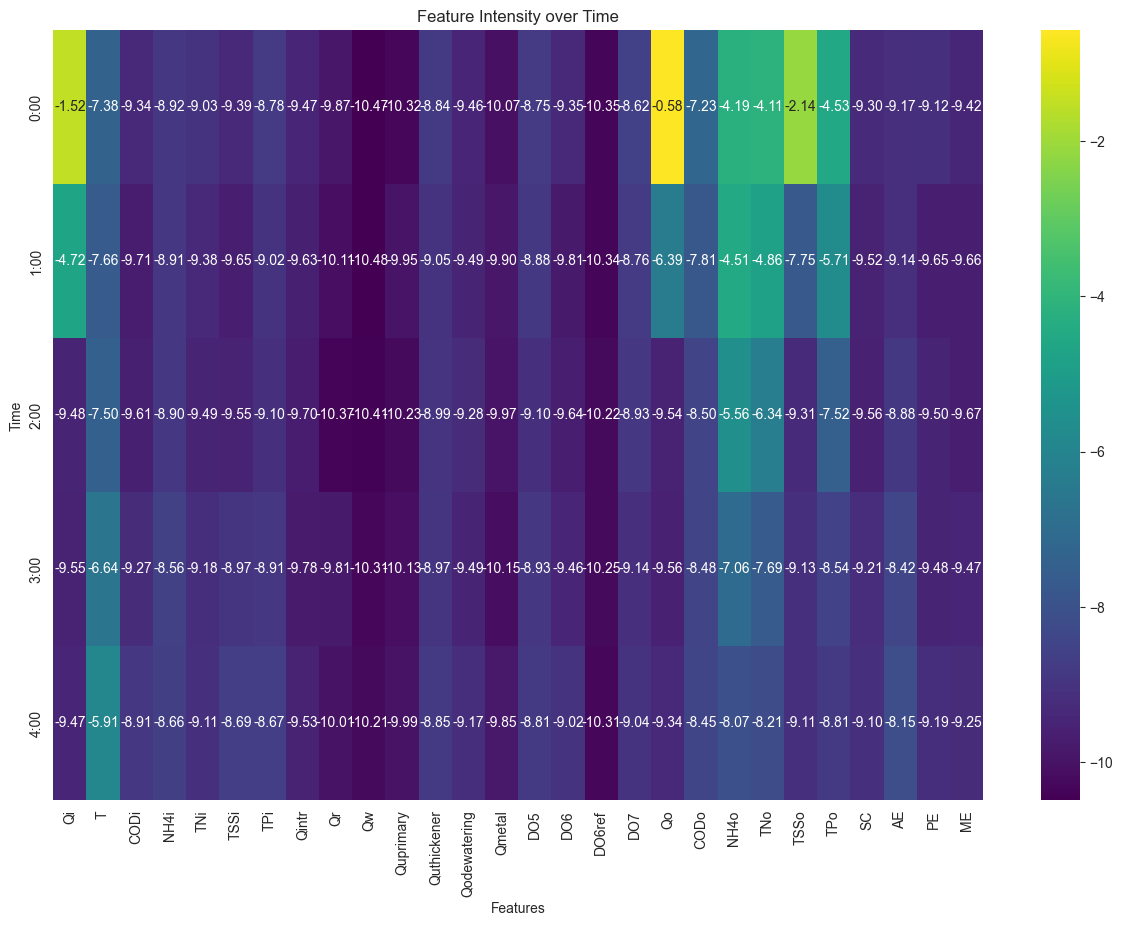

kk 5
Test r2 score: 0.9878197967779554
Test r2_adj score: 0.9849172802654682
test rmse: 484.7284203022161


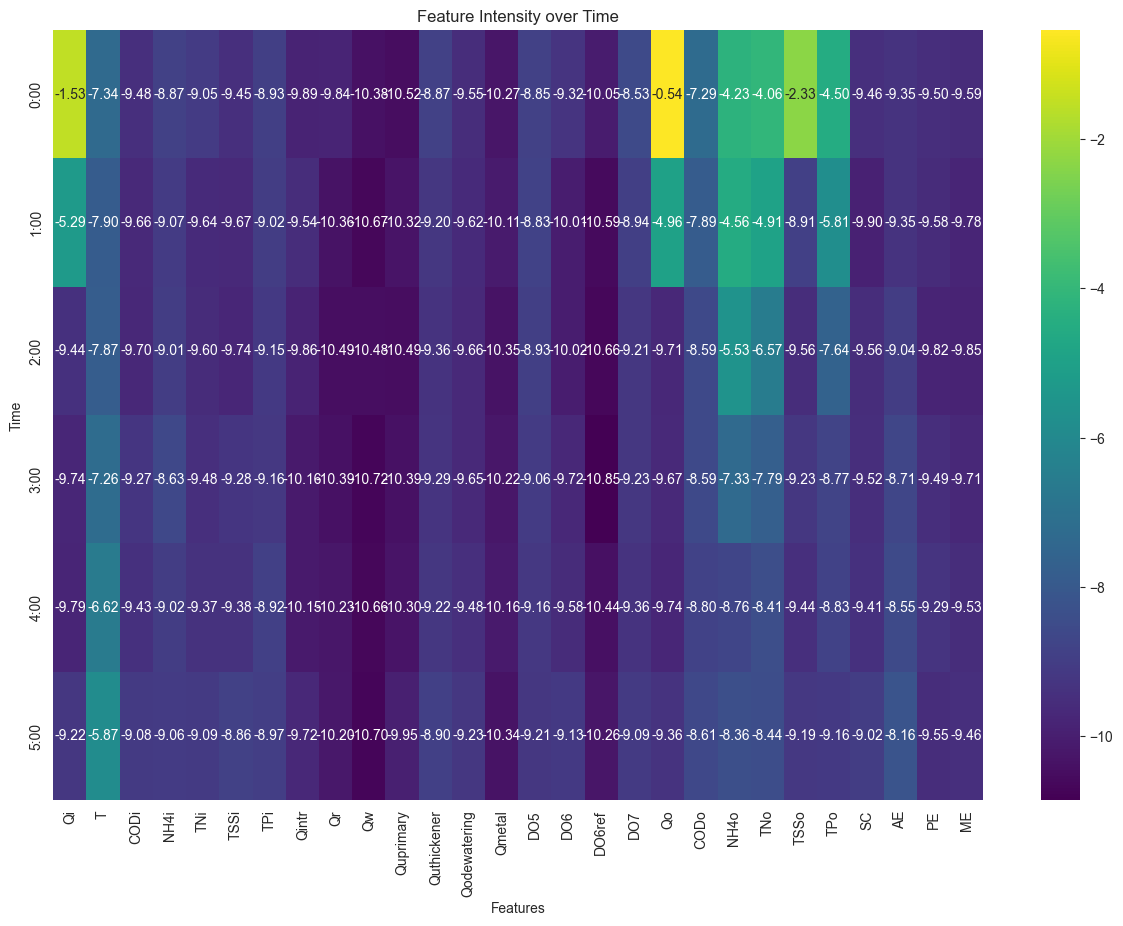

kk 6
Test r2 score: 0.9877321445492404
Test r2_adj score: 0.9841751923771267
test rmse: 486.62565307107474


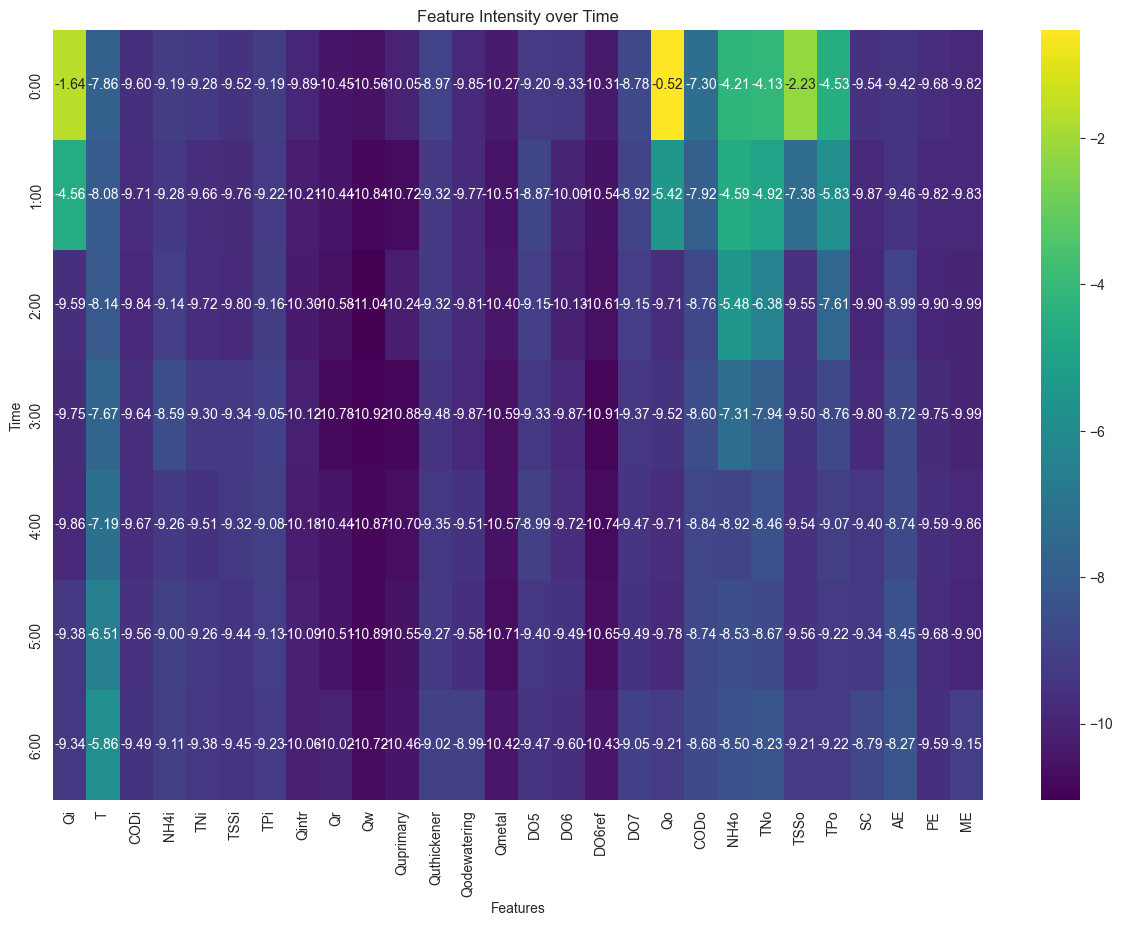

kk 7
Test r2 score: 0.9895889400808688
Test r2_adj score: 0.9859900551705519
test rmse: 448.2890671959715


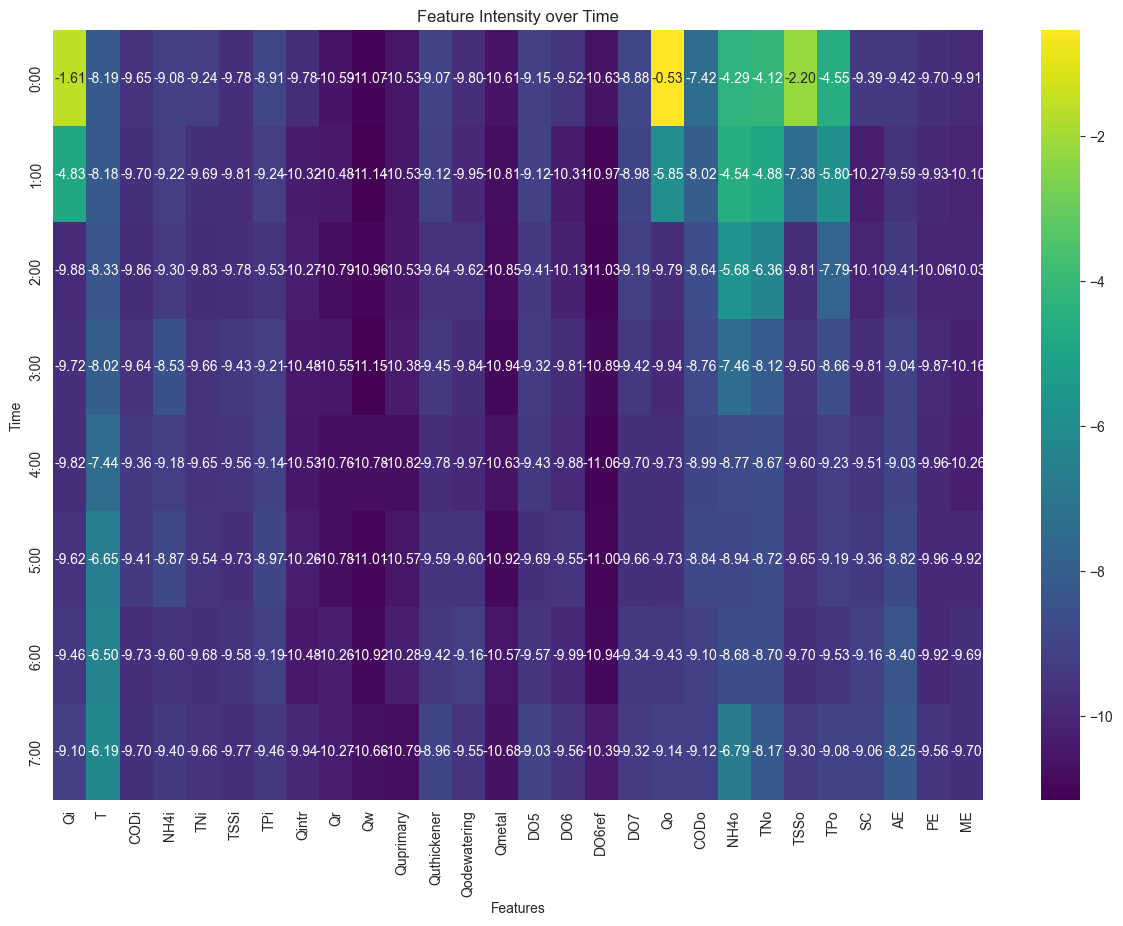

kk 8
Test r2 score: 0.9898953484865786
Test r2_adj score: 0.9857882965811234
test rmse: 441.64299321532405


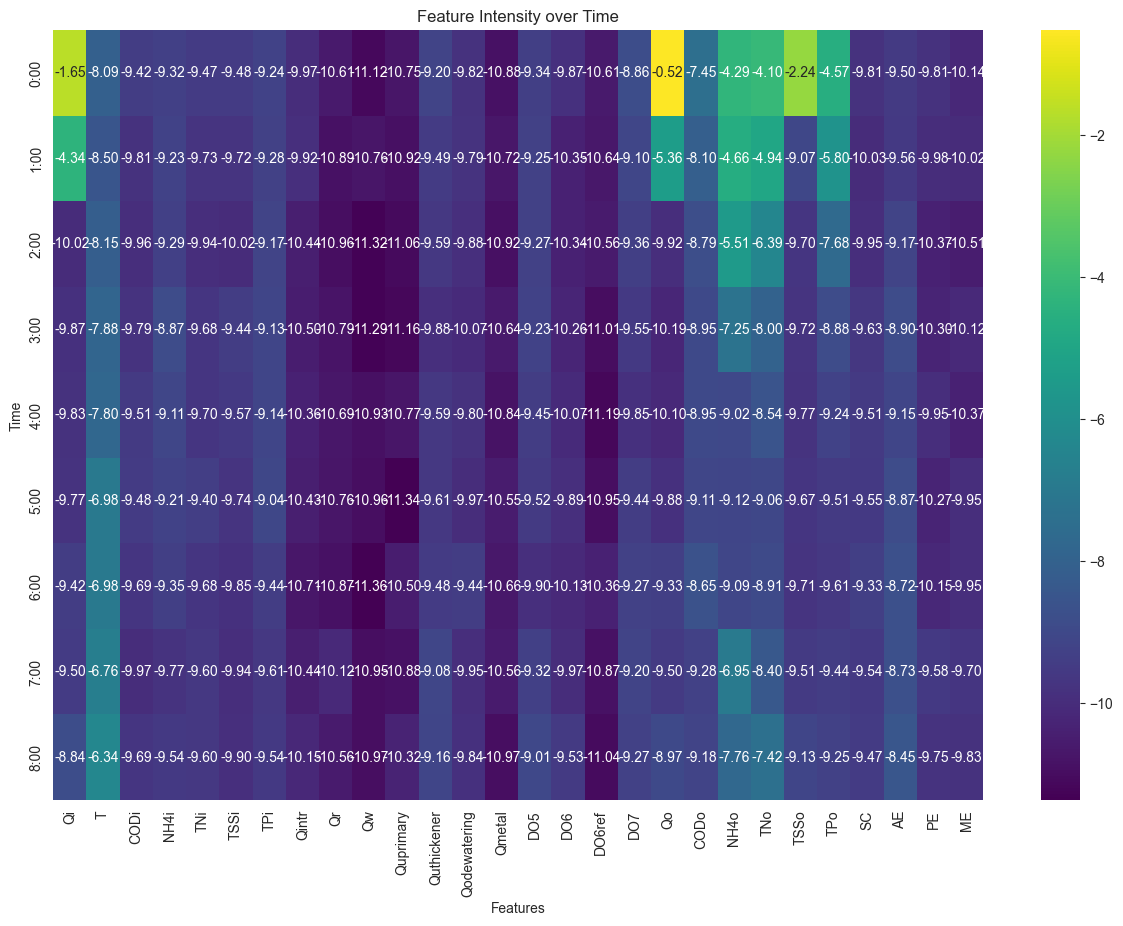

kk 9
Test r2 score: 0.9908024193527276
Test r2_adj score: 0.9864522122898285
test rmse: 421.3543450462456


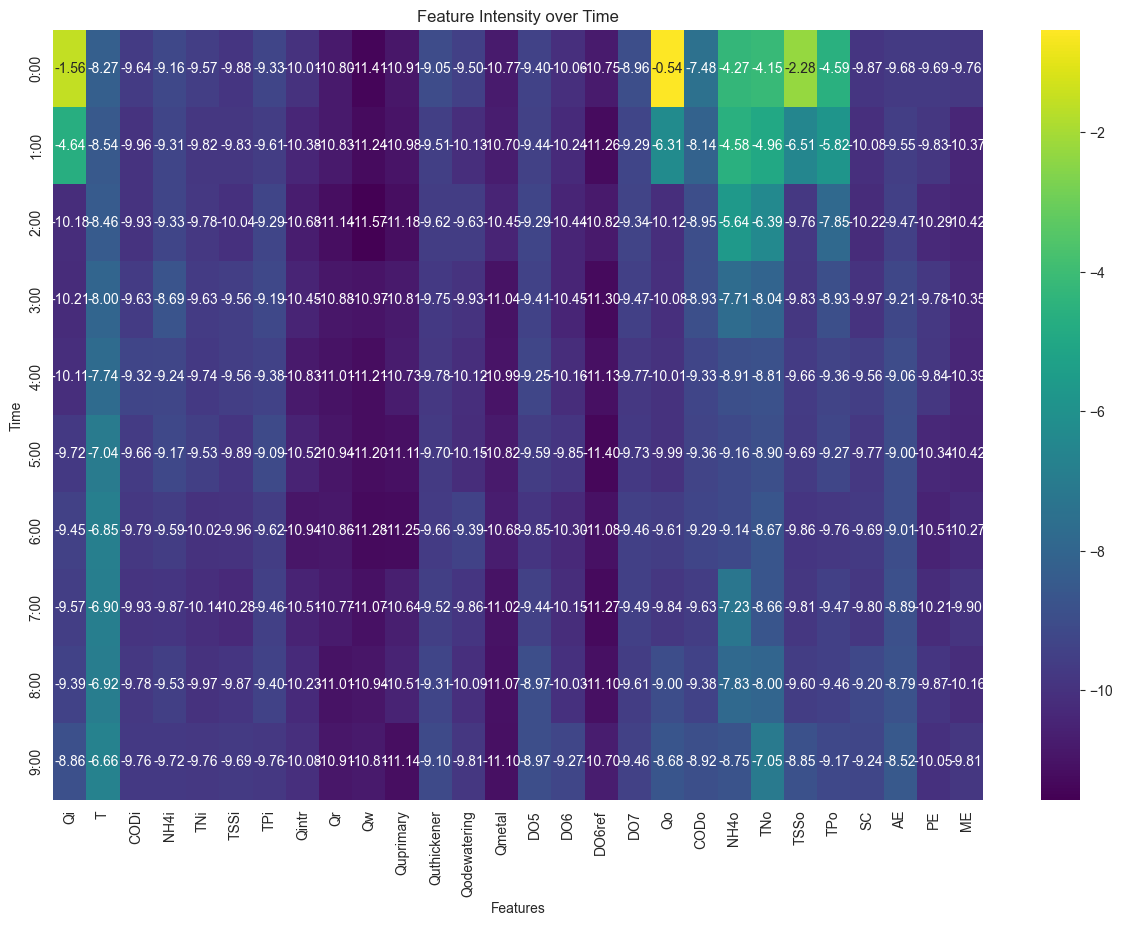

kk 10
Test r2 score: 0.9903859918860772
Test r2_adj score: 0.9851357888735095
test rmse: 430.78732502980785


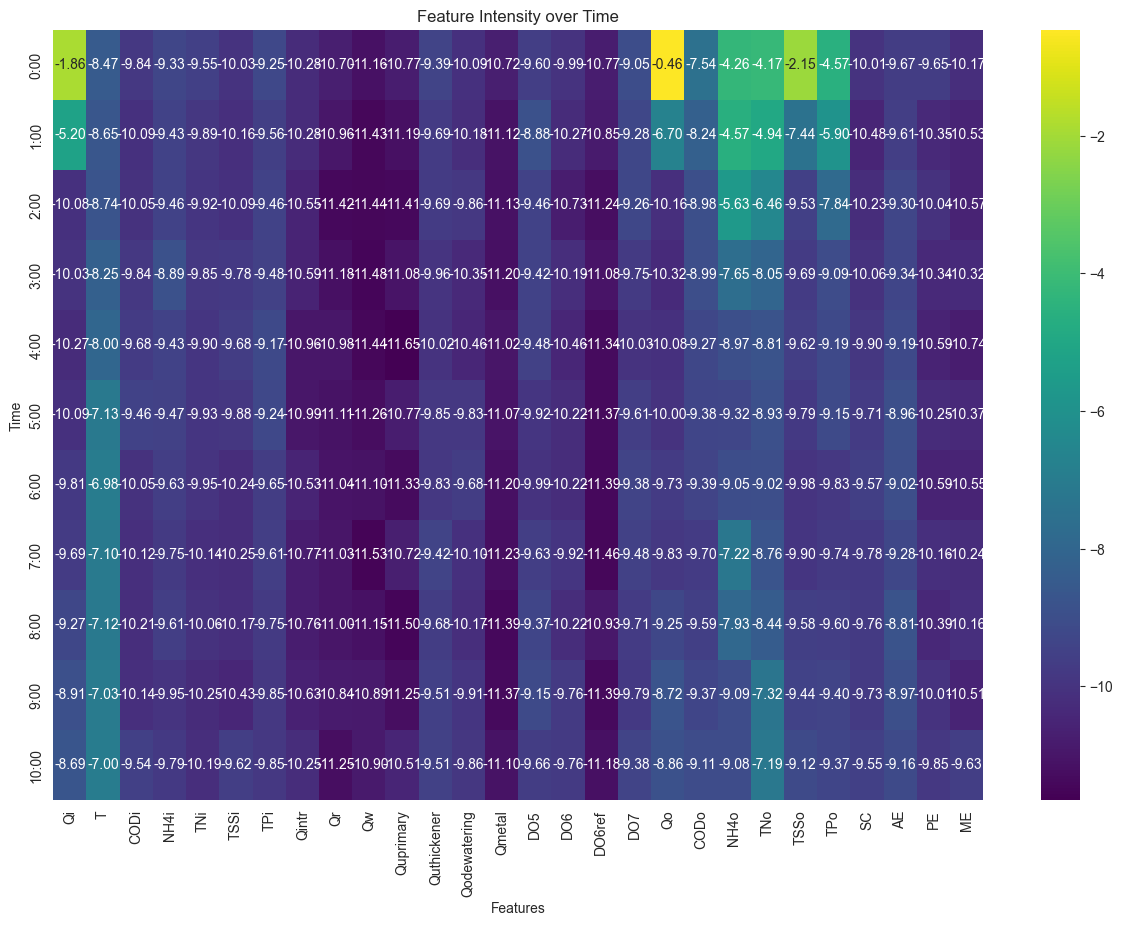

kk 11
Test r2 score: 0.9916361119719349
Test r2_adj score: 0.9863930776856852
test rmse: 401.80448446129805


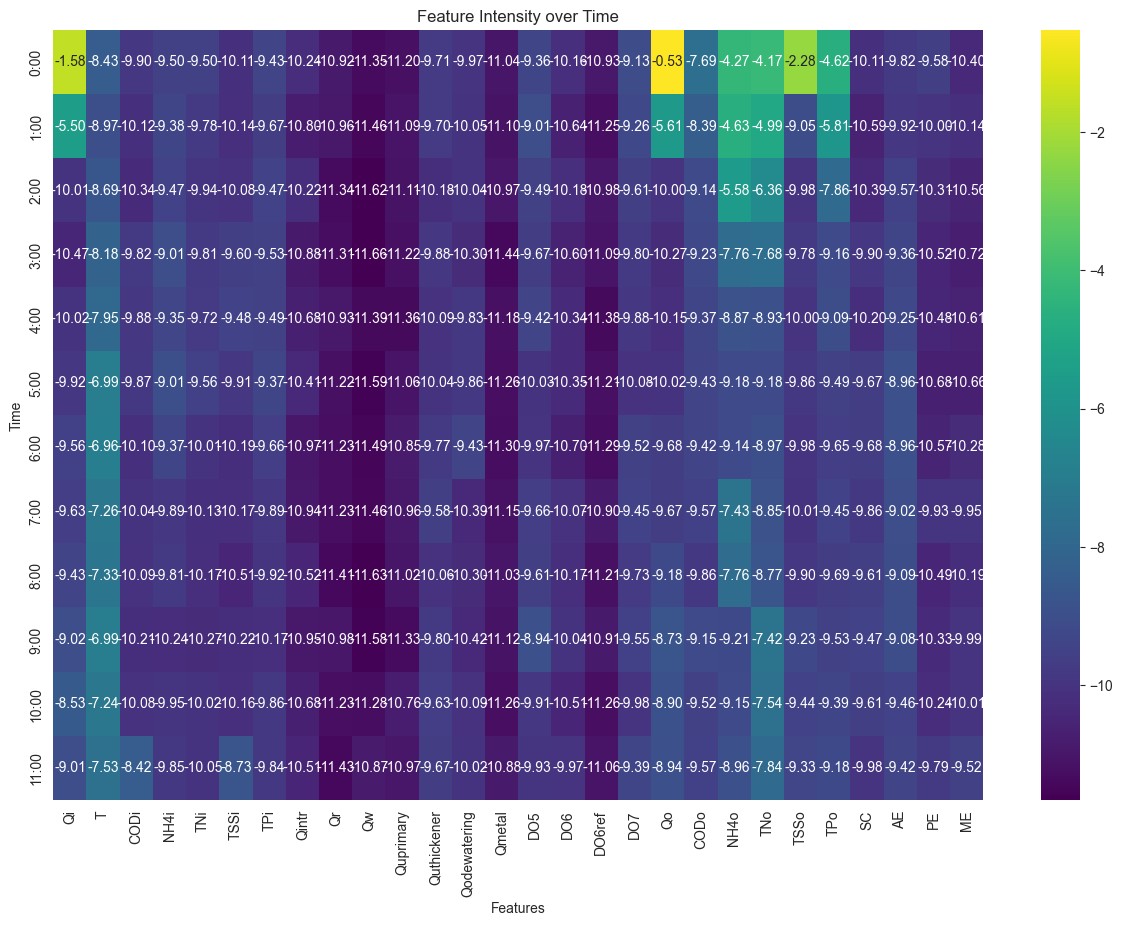

kk 12
Test r2 score: 0.9905335448695936
Test r2_adj score: 0.9837504943430818
test rmse: 427.46874373234425


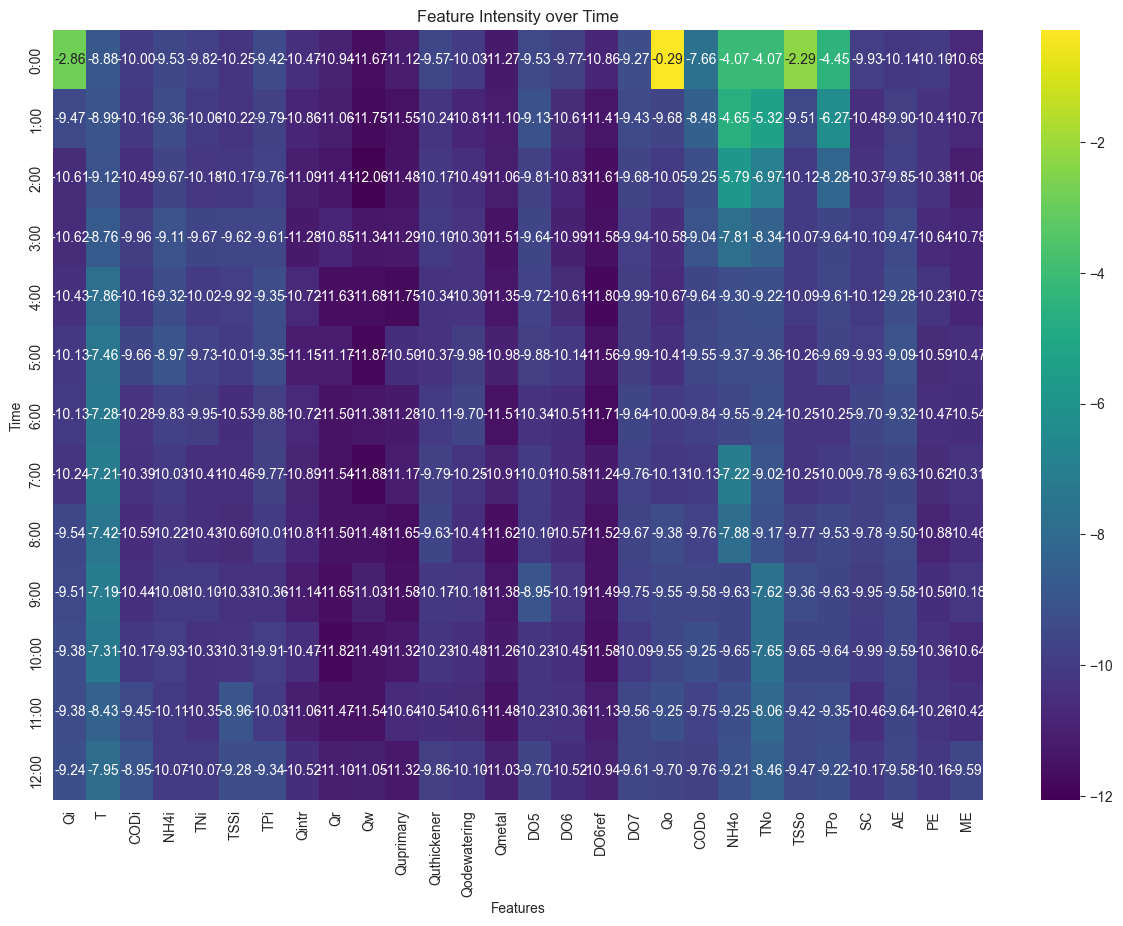

kk 13
Test r2 score: 0.9903791023874436
Test r2_adj score: 0.9825220360038559
test rmse: 430.9416507352711


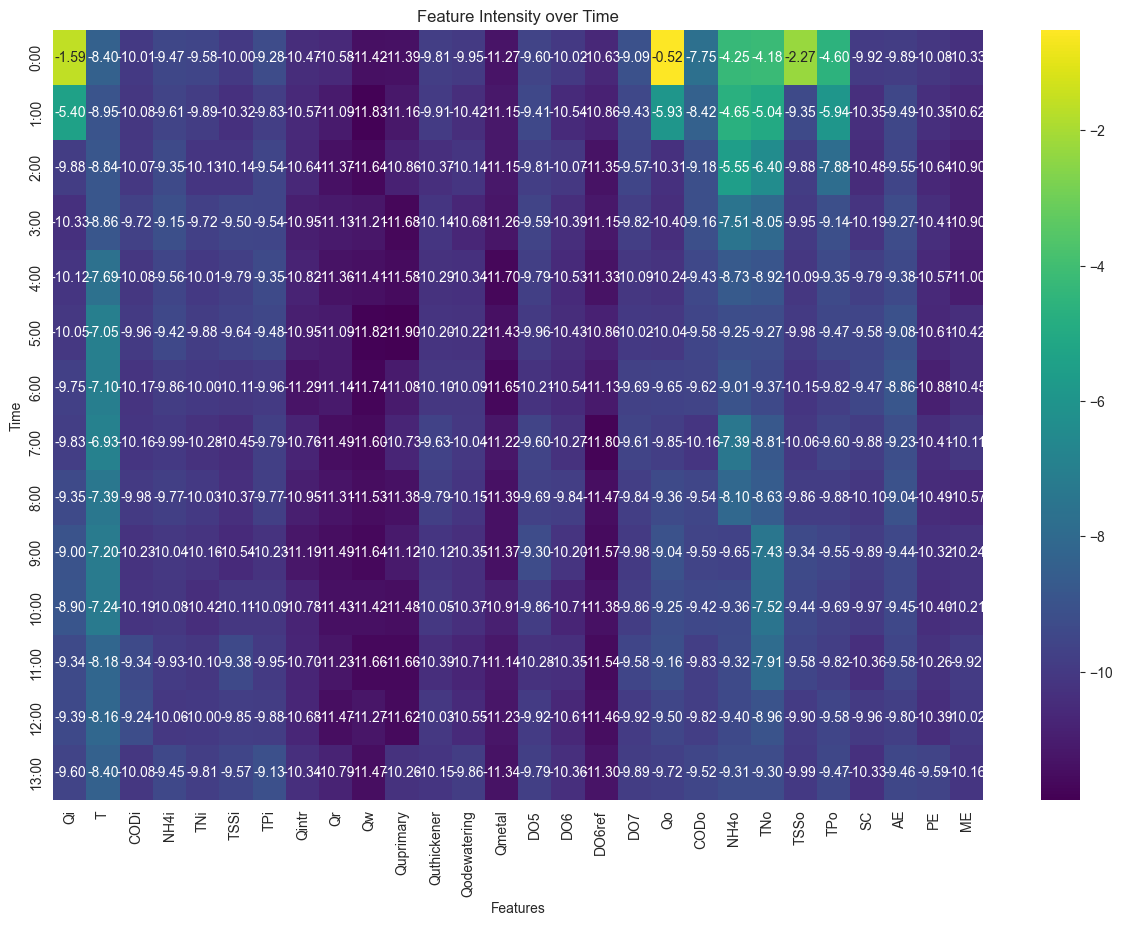

kk 14
Test r2 score: 0.9903155434256493
Test r2_adj score: 0.9813167120955004
test rmse: 432.36278193056563


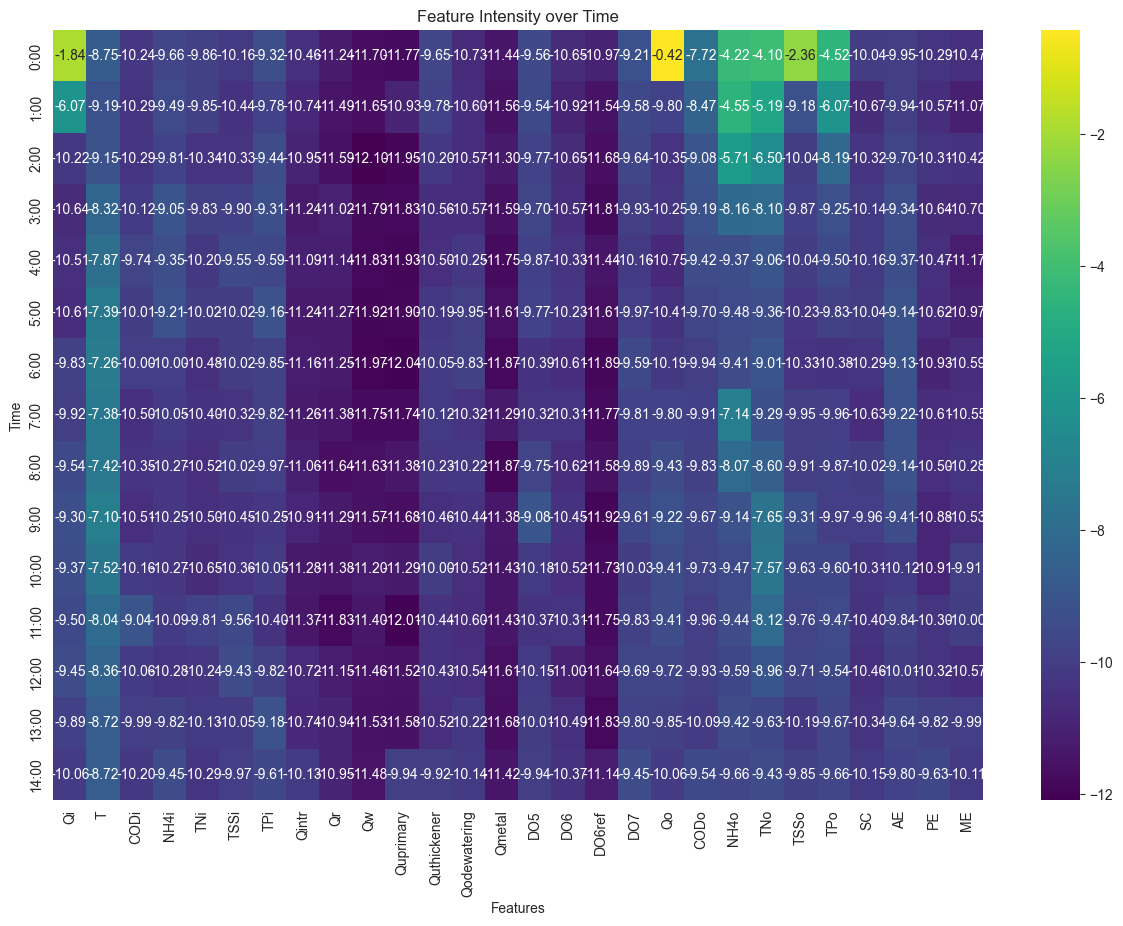

kk 15
Test r2 score: 0.9913981653348628
Test r2_adj score: 0.9823094343679254
test rmse: 407.47992718415935


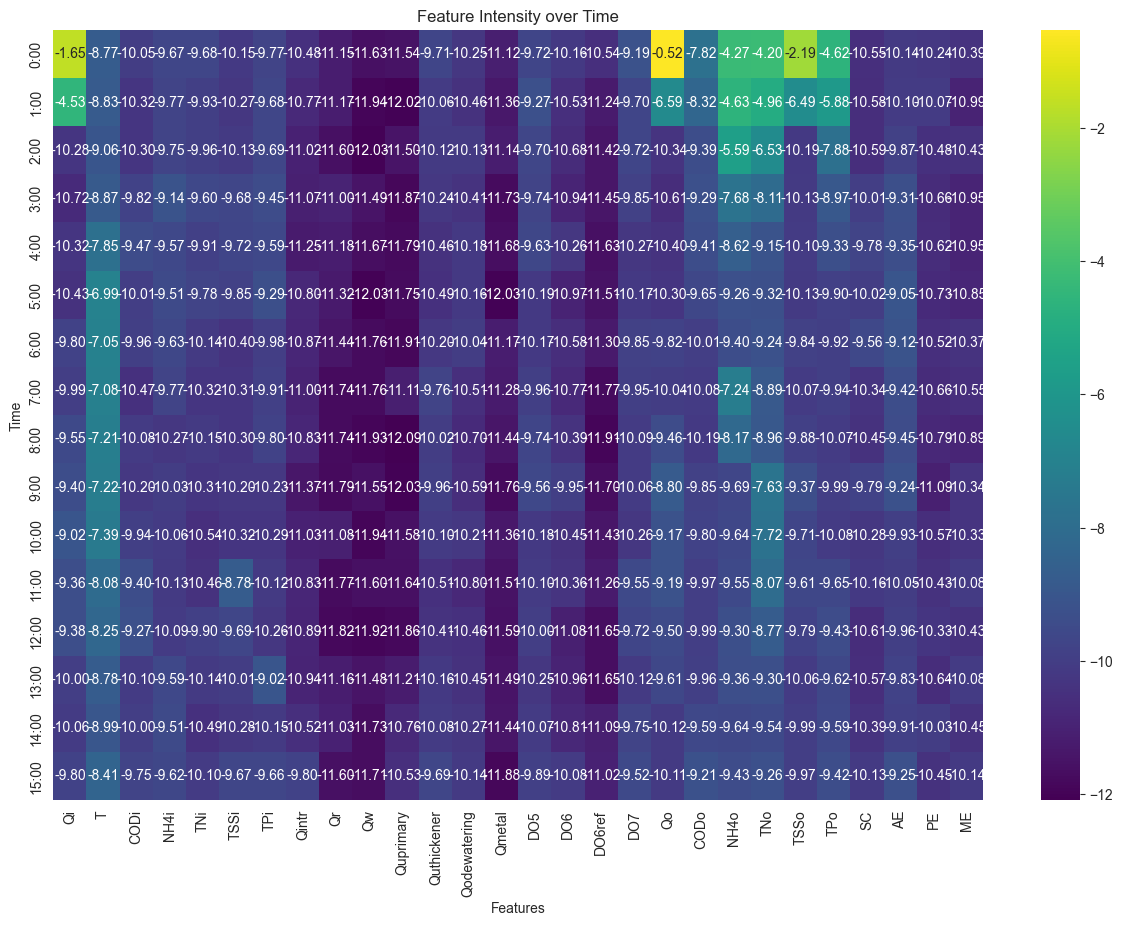

In [176]:
# eqi
n_features = 28
for kk in list_hours_shifted:
    df = df_eqi[df_eqi['kk'] == kk]
    fname_prefix = 'data/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'

    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    list_col_drop = ['EQI', 'OCI']
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])
    y_ = df_delay_16_hours_result['EQI']


    X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)

    model = RandomForestRegressor(n_estimators=df['n_estimators'][0],
                                  max_depth=df['max_depth'][0],
                                  min_samples_split=df['min_samples_split'][0],
                                  max_features=df['max_features'][0],
                                  random_state=42,
                                  n_jobs=-1)
    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    p = len(X_test.columns)
    r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

    if r2_adj > best_adj_r2:
        best_adj_r2 = r2_adj
        best_delay = kk

    print(f"kk {kk}")
    print(f"Test r2 score: {r2}")
    print(f"Test r2_adj score: {r2_adj}")
    print(f"test rmse: {rmse}")
    importances = model.feature_importances_
    
    # Generate some example data
    # Replace this with your actual data
    np.random.seed(0)
    #data = importances.reshape(int(kk)+1, 28)
    # apply log scale?
    data = np.log(importances).reshape(int(kk)+1, 28) 

    # Create time and feature labels for the axes
    time_labels = [f"{i}:00" for i in range(data.shape[0])]
    feature_labels = [f"{feature}" for feature in X_train.columns[:n_features]]

    # Create the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(data, annot=True, fmt=".2f", xticklabels=feature_labels, yticklabels=time_labels, cmap="viridis")

    # Adding titles and labels
    plt.title("Feature Intensity over Time")
    plt.xlabel("Features")
    plt.ylabel("Time")

    # Show the plot
    plt.show()

kk 1
Test r2 score: 0.9718120555500834
Test r2_adj score: 0.9698799565425004
test rmse: 285.91039831310457


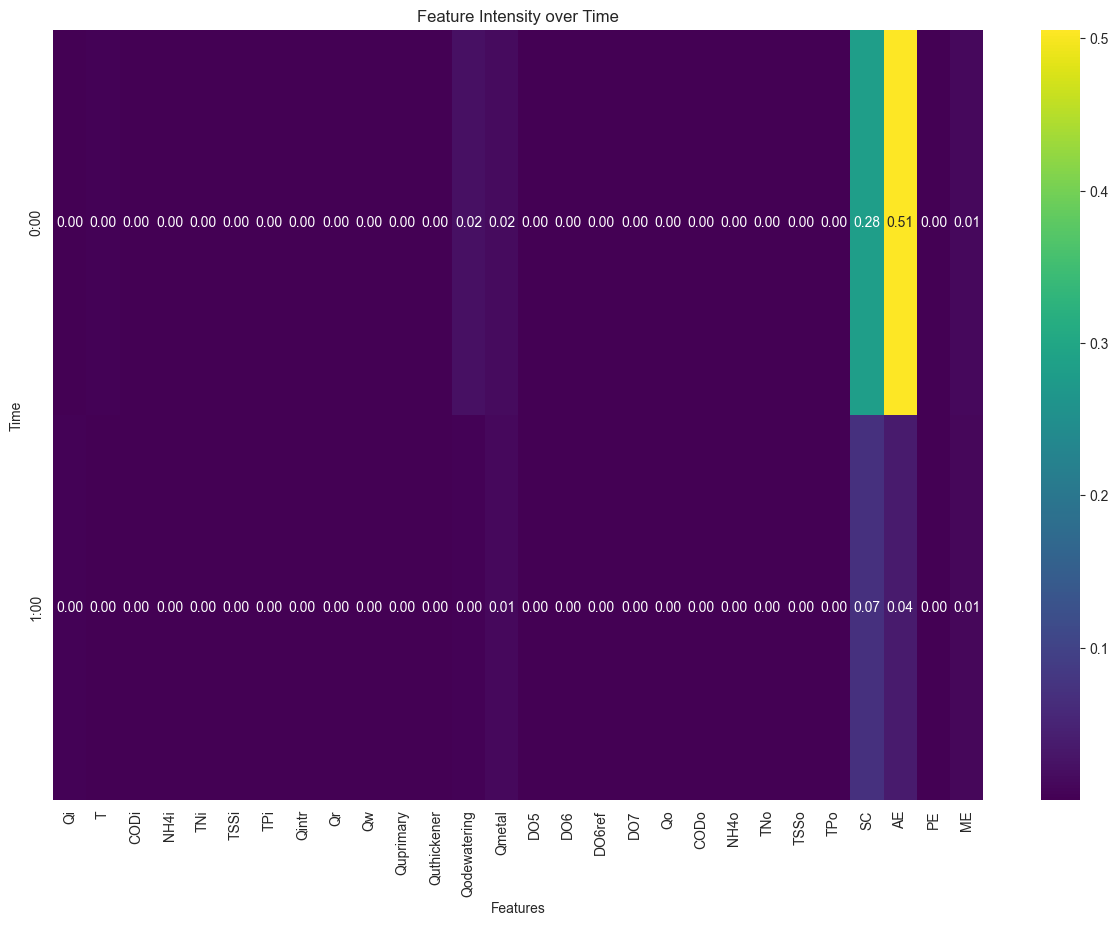

kk 2
Test r2 score: 0.9701547043320833
Test r2_adj score: 0.966977258405461
test rmse: 294.1956113777687


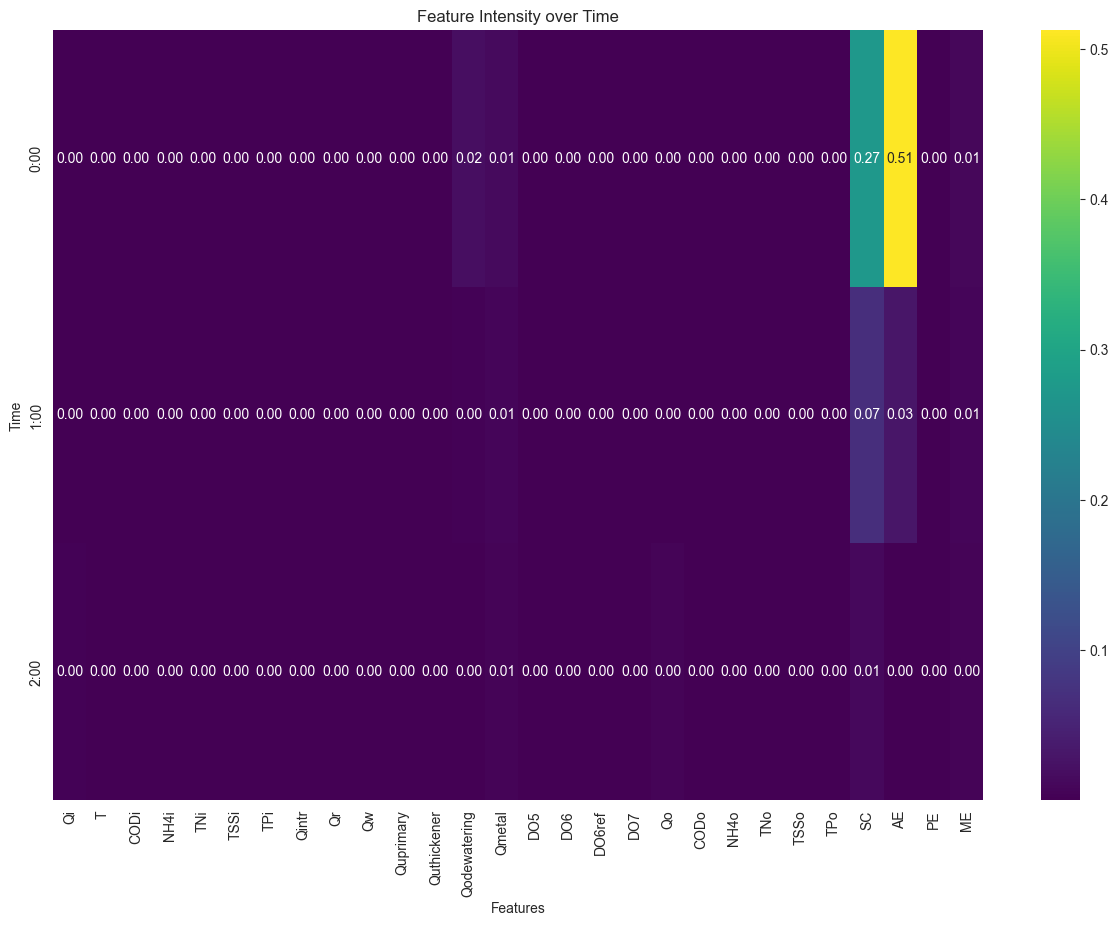

kk 3
Test r2 score: 0.9695775171197927
Test r2_adj score: 0.9651000951978699
test rmse: 297.0267578416483


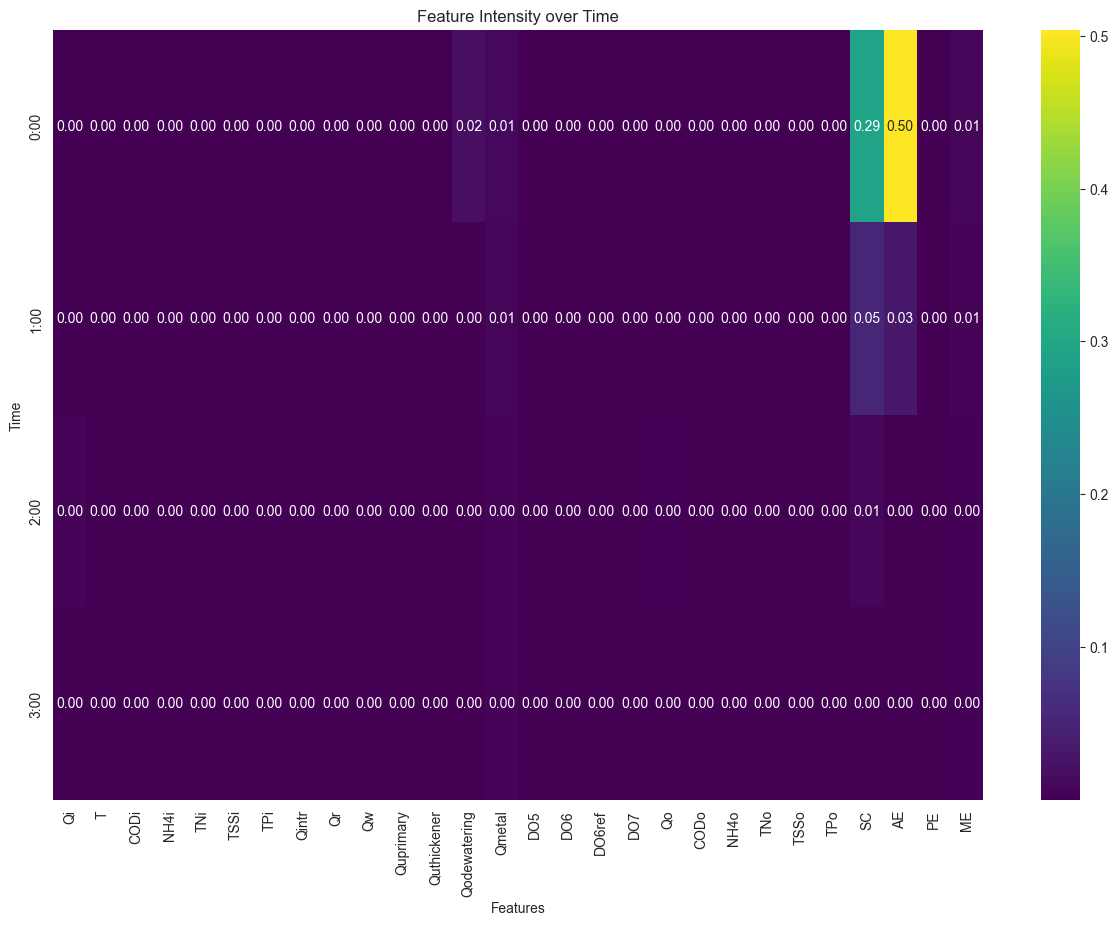

kk 4
Test r2 score: 0.96949898805212
Test r2_adj score: 0.9636734196036845
test rmse: 297.4098659789971


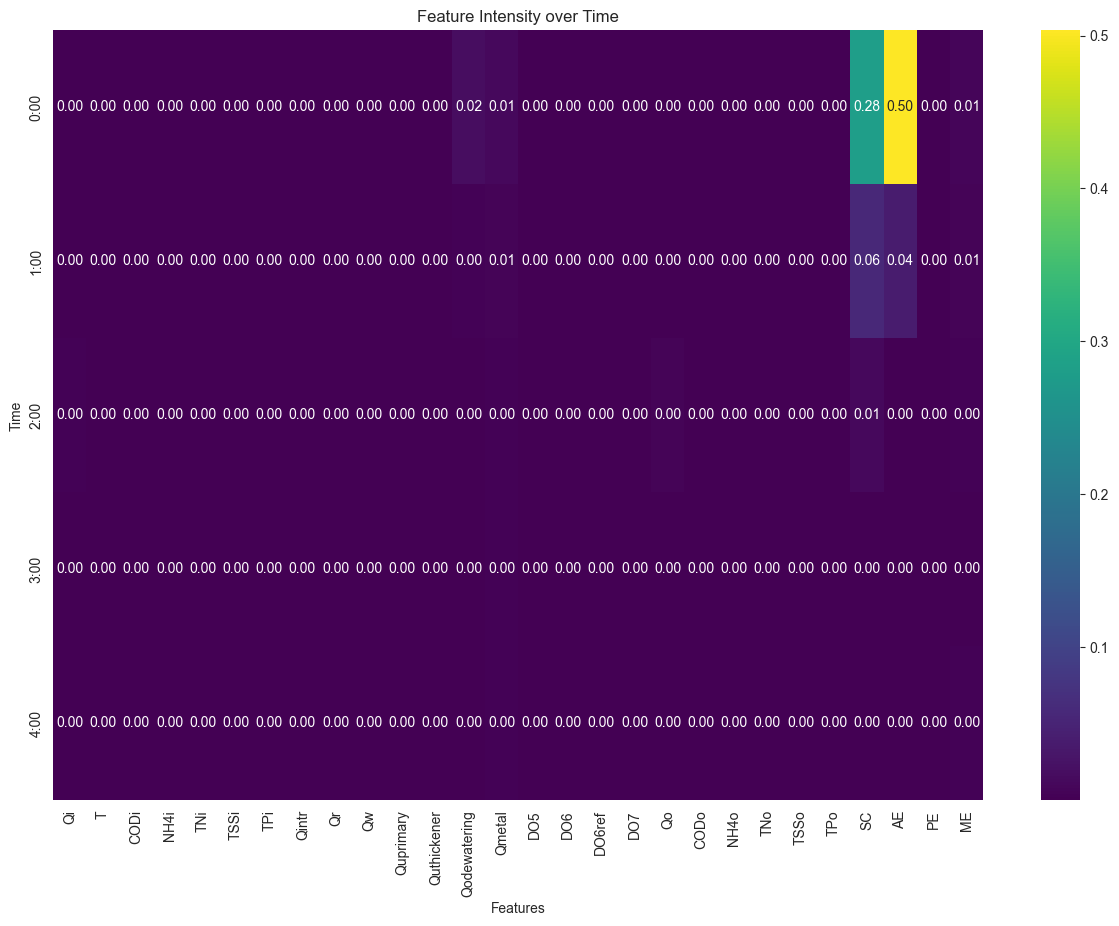

kk 5
Test r2 score: 0.9691955369495411
Test r2_adj score: 0.9618548989460275
test rmse: 298.8856529378852


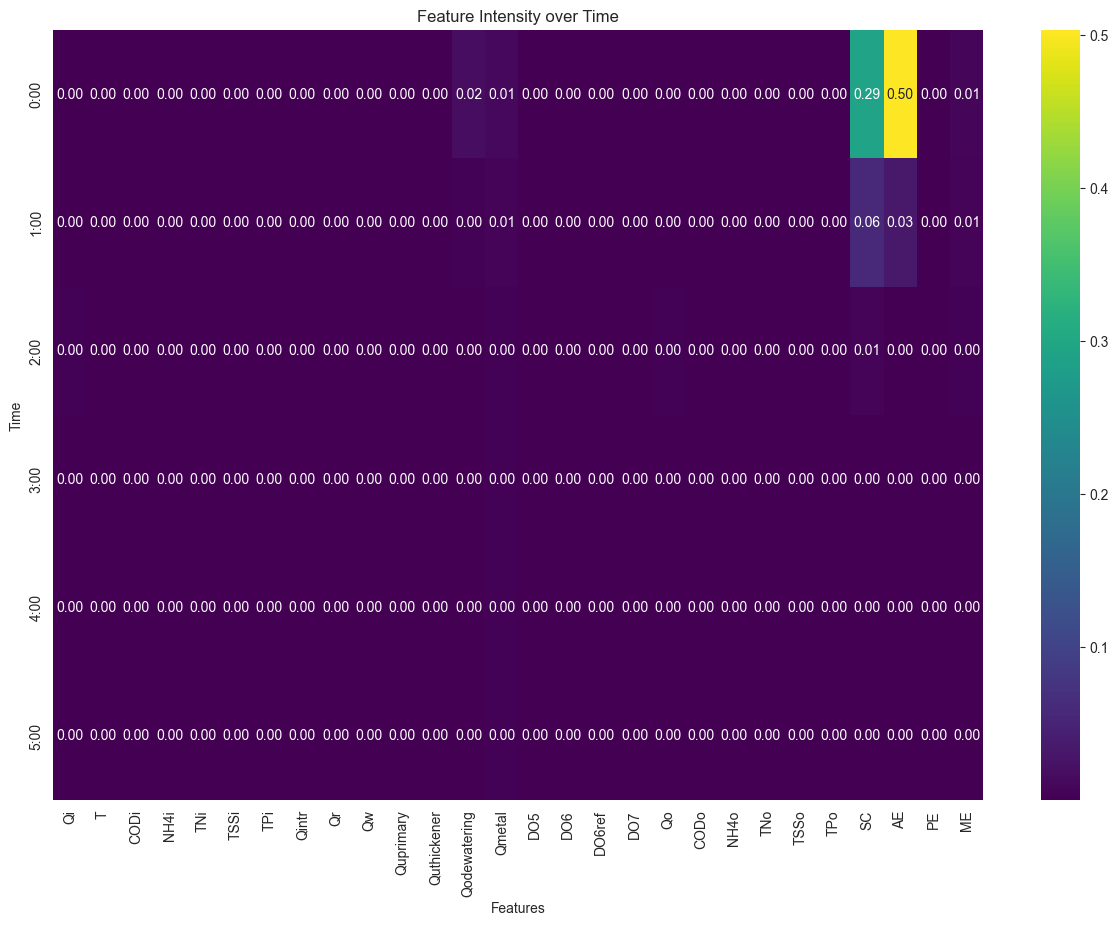

kk 6
Test r2 score: 0.9688939332696577
Test r2_adj score: 0.9598750145135229
test rmse: 300.4939193339624


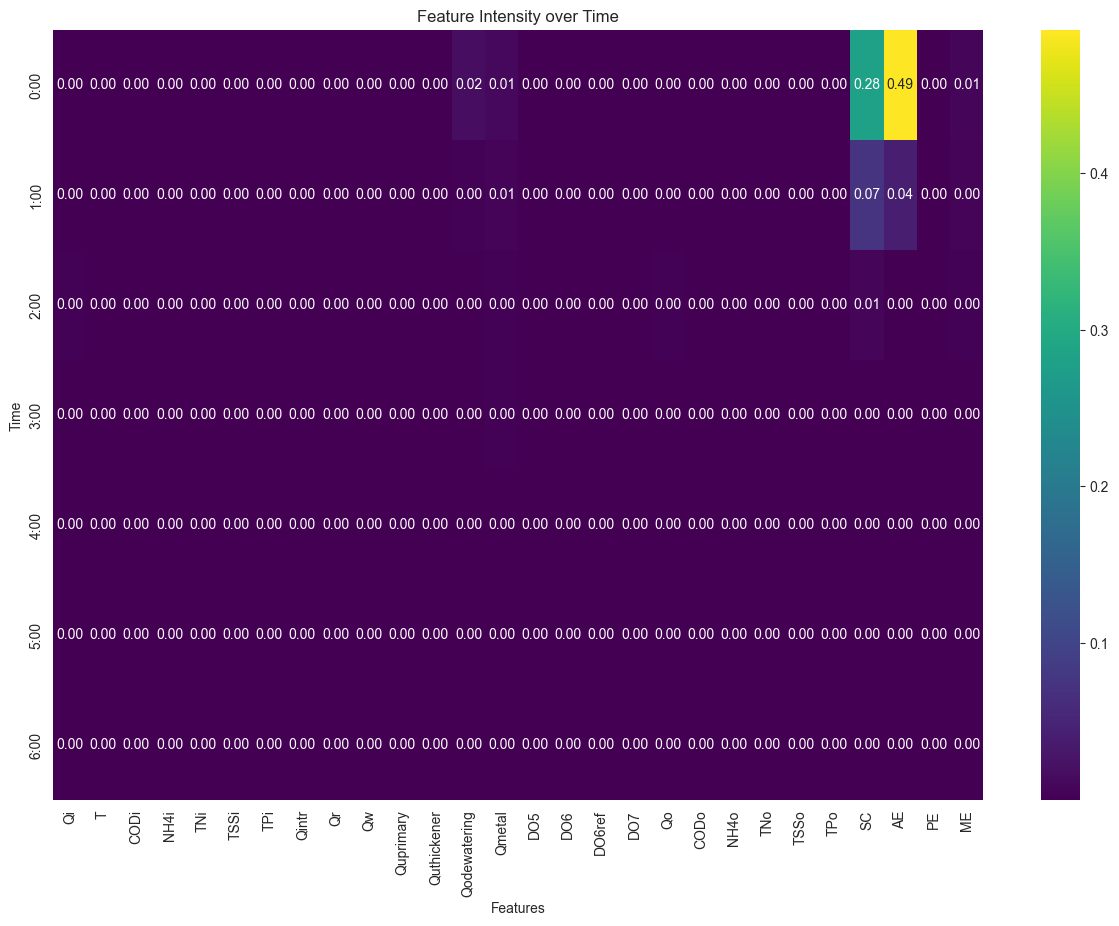

kk 7
Test r2 score: 0.9680208585209567
Test r2_adj score: 0.9569663404788182
test rmse: 304.6818183081781


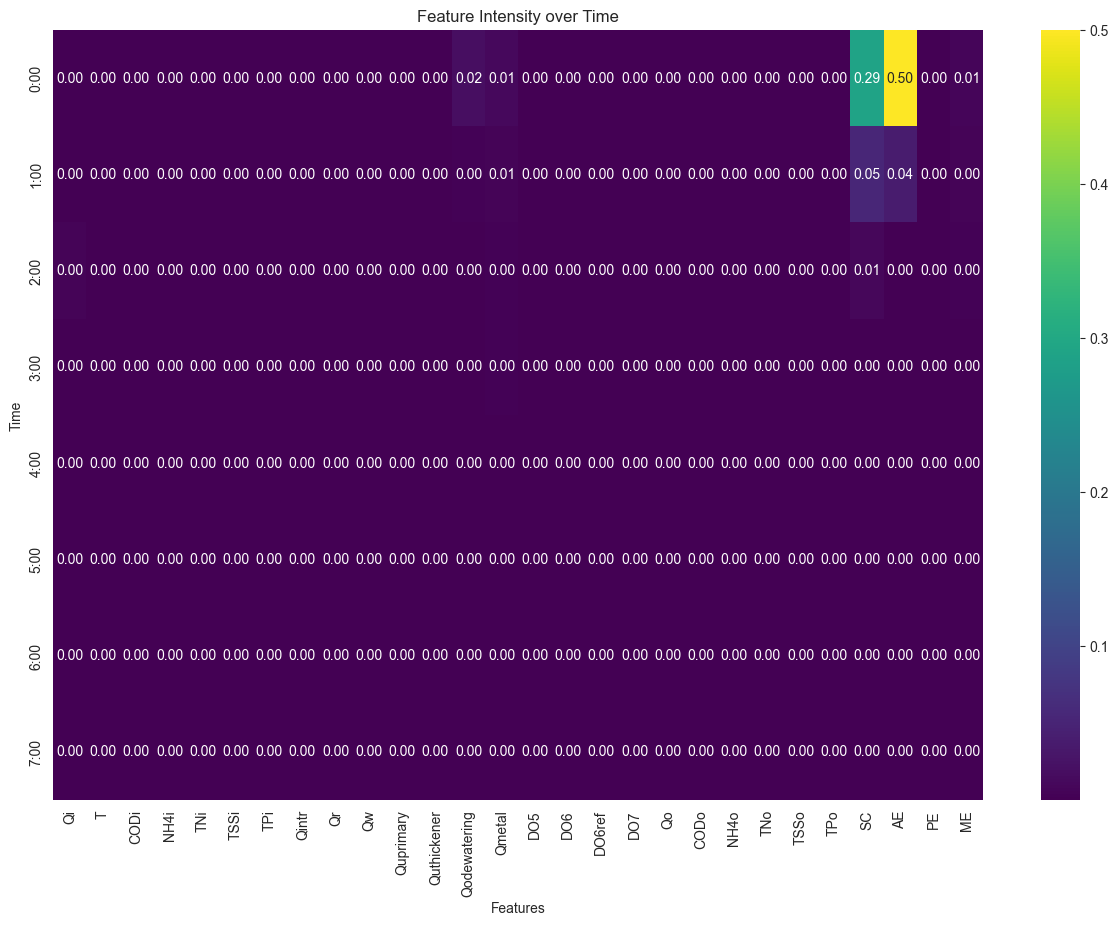

kk 8
Test r2 score: 0.9674713174426012
Test r2_adj score: 0.9542499819515294
test rmse: 307.28854828284545


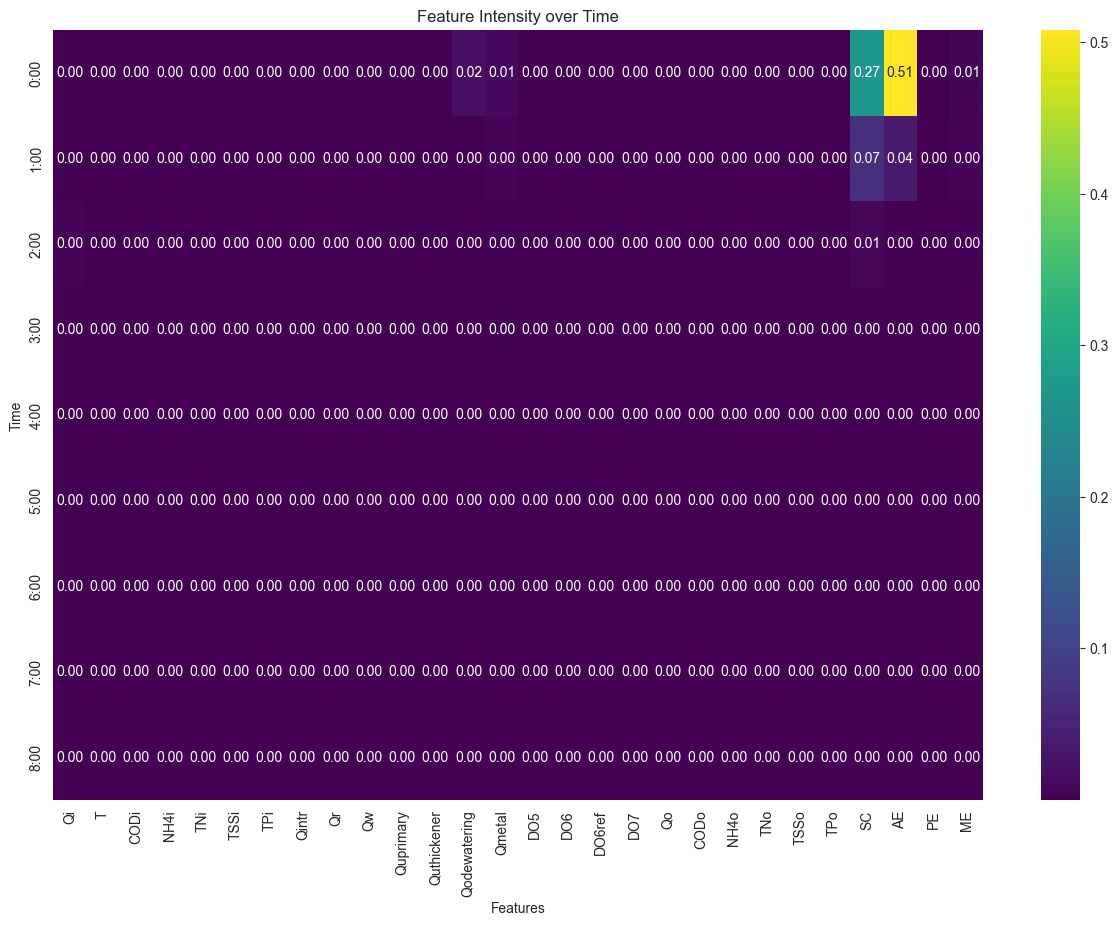

kk 9
Test r2 score: 0.9676606851864847
Test r2_adj score: 0.9523650633152275
test rmse: 306.39279303084896


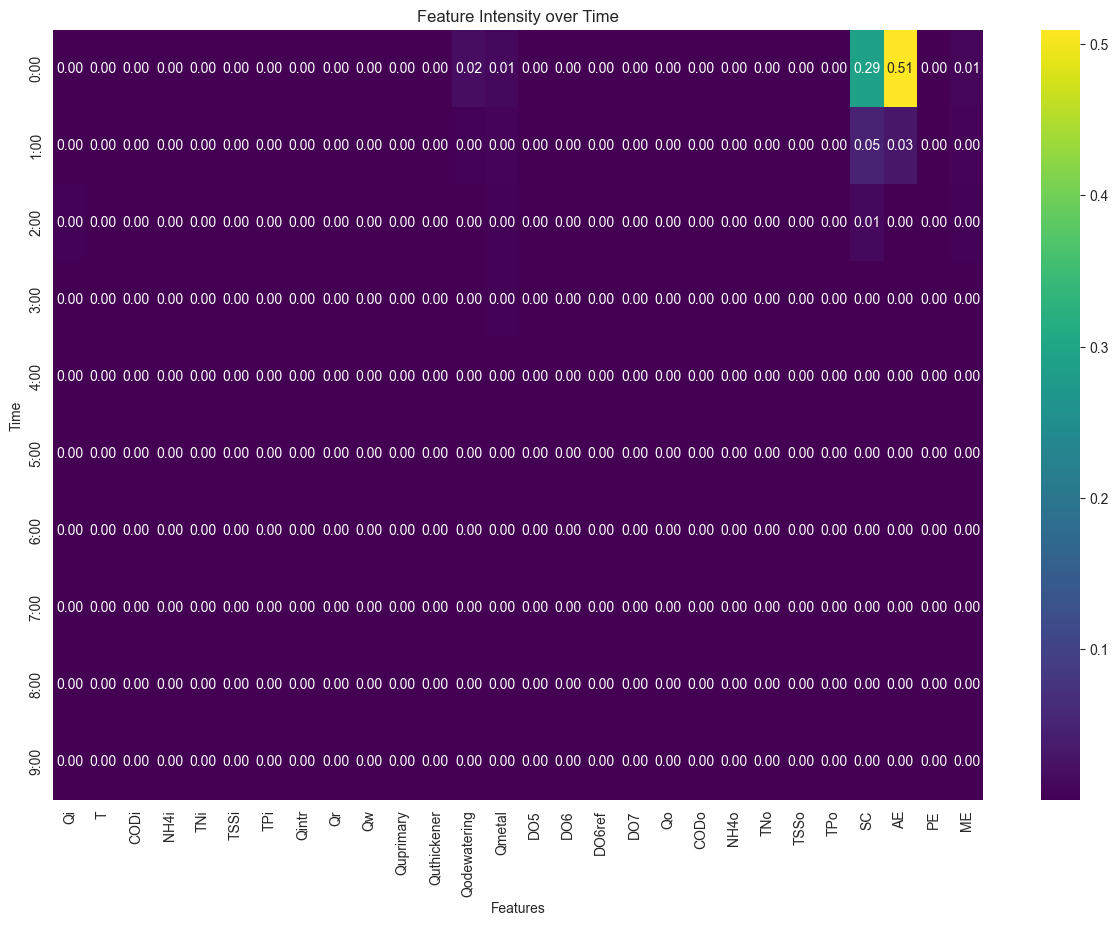

kk 10
Test r2 score: 0.9673985269591806
Test r2_adj score: 0.9495948856532013
test rmse: 307.6321709103478


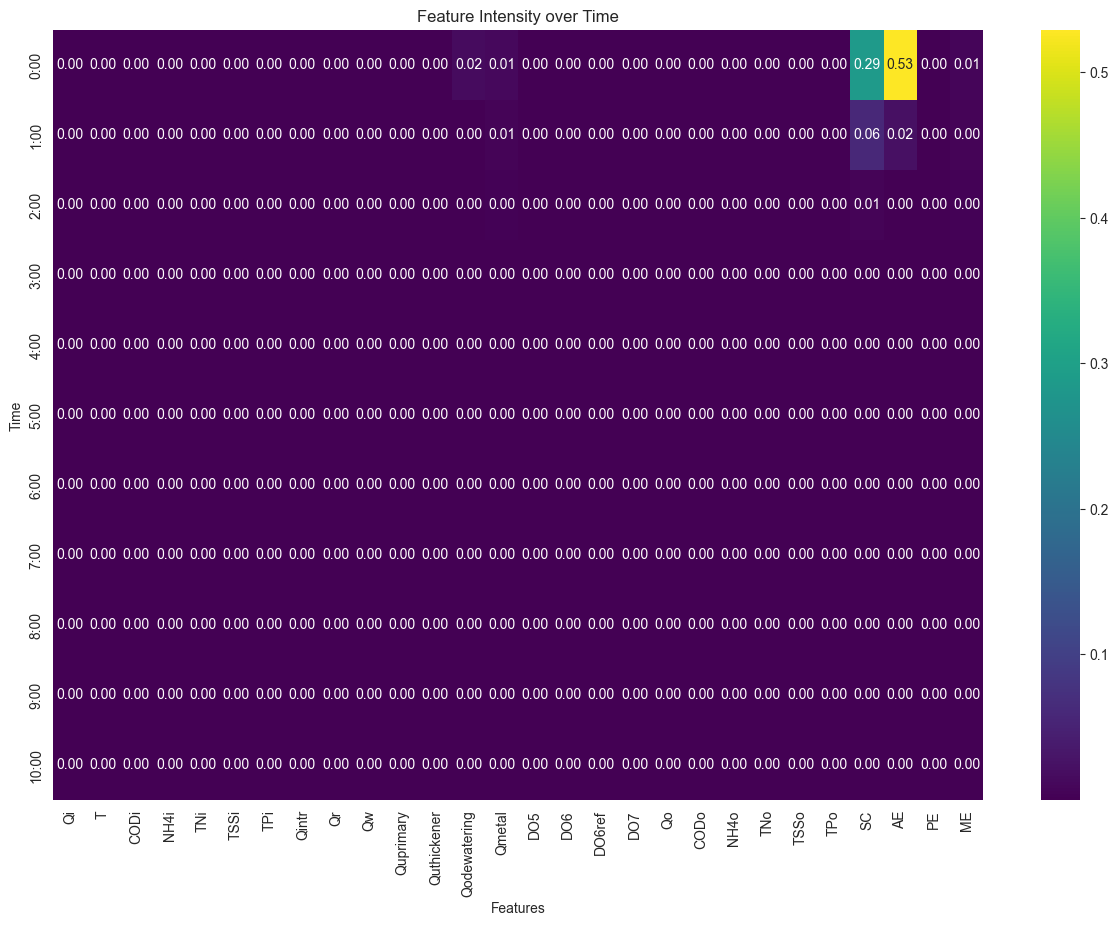

kk 11
Test r2 score: 0.9666431066660582
Test r2_adj score: 0.9457328153223933
test rmse: 311.1758873541661


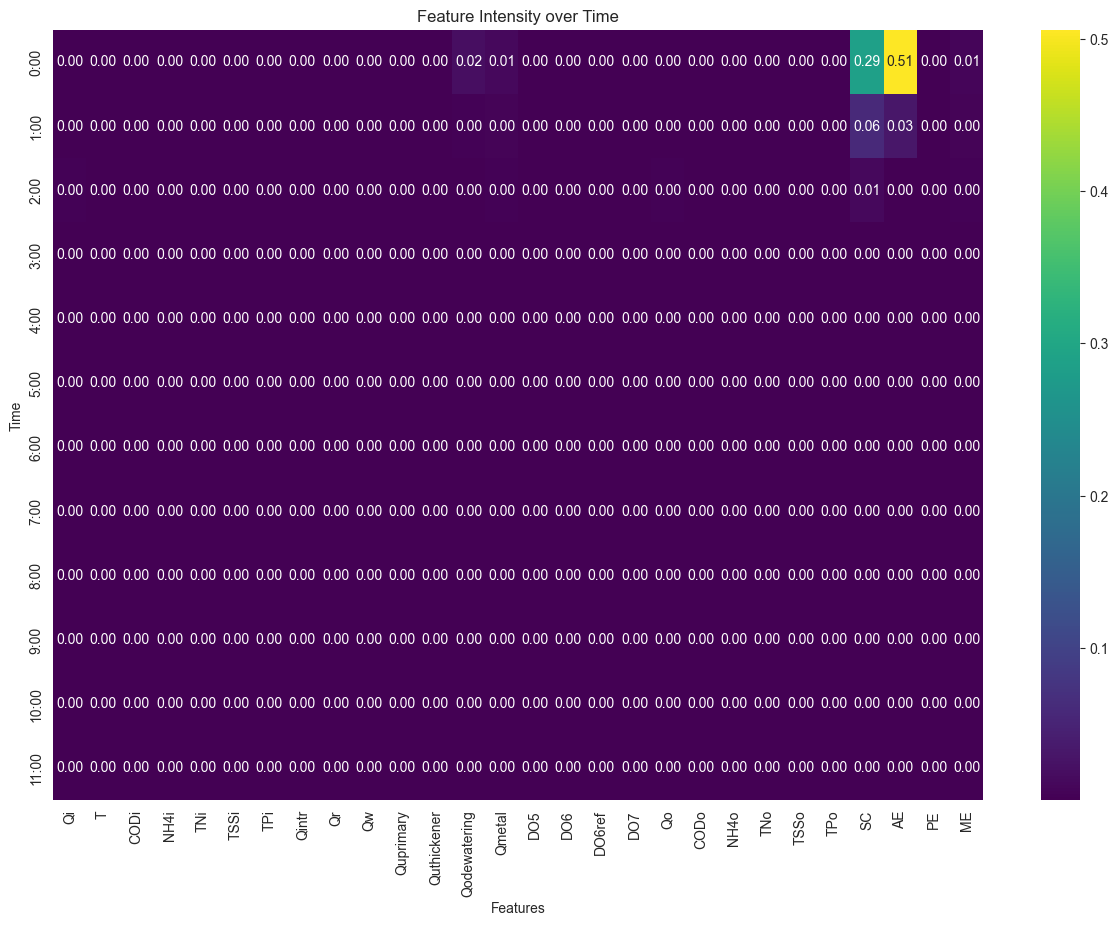

kk 12
Test r2 score: 0.9665255509799084
Test r2_adj score: 0.9425399221544886
test rmse: 311.7237249808843


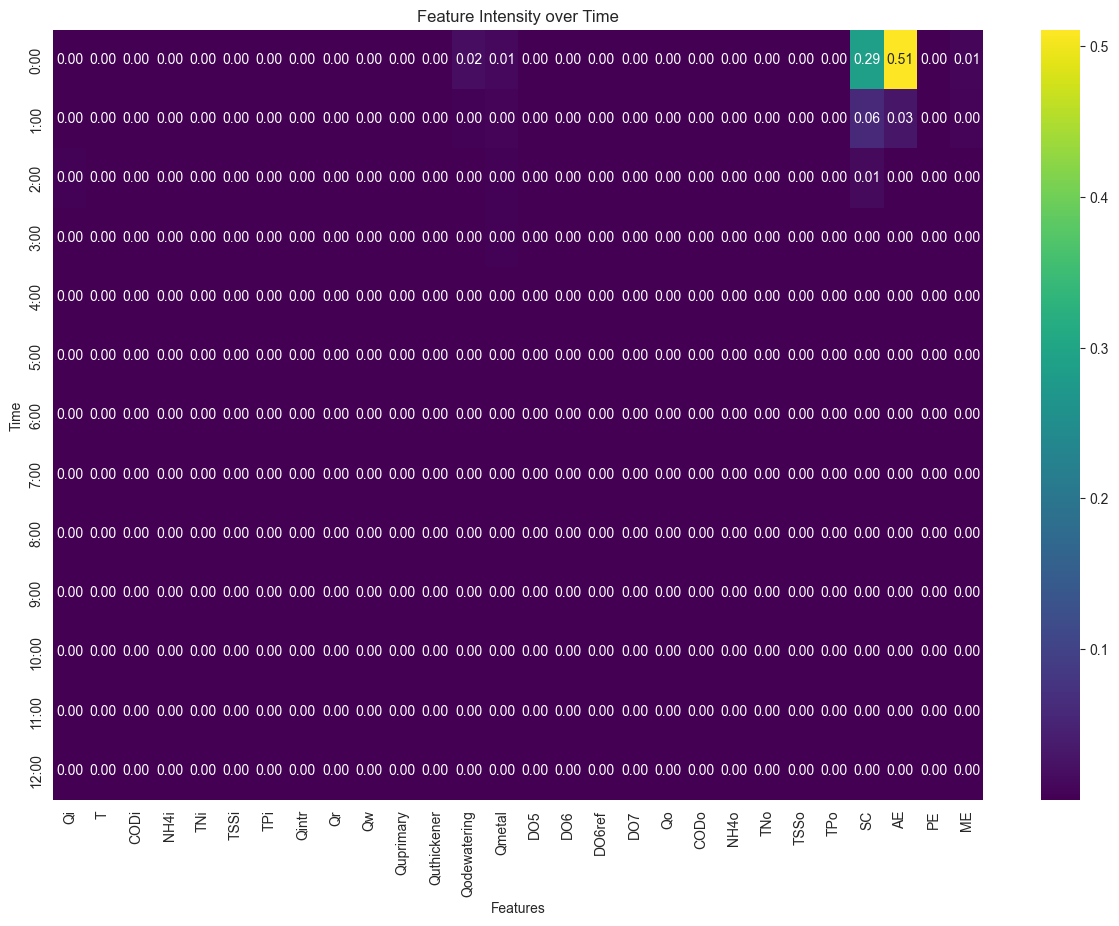

kk 13
Test r2 score: 0.9660995634214766
Test r2_adj score: 0.9384142068823492
test rmse: 313.70091407205865


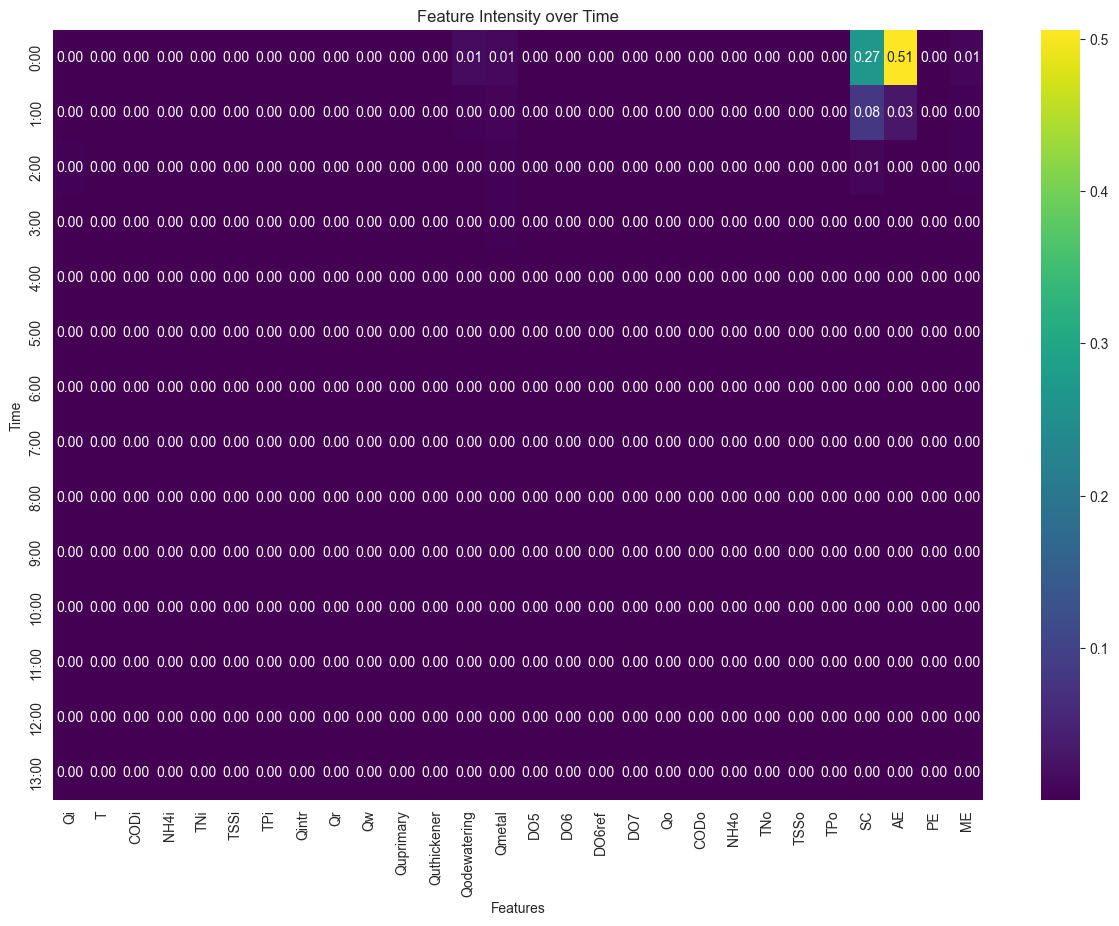

kk 14
Test r2 score: 0.9659129569051819
Test r2_adj score: 0.9342391557993774
test rmse: 314.5631197607667


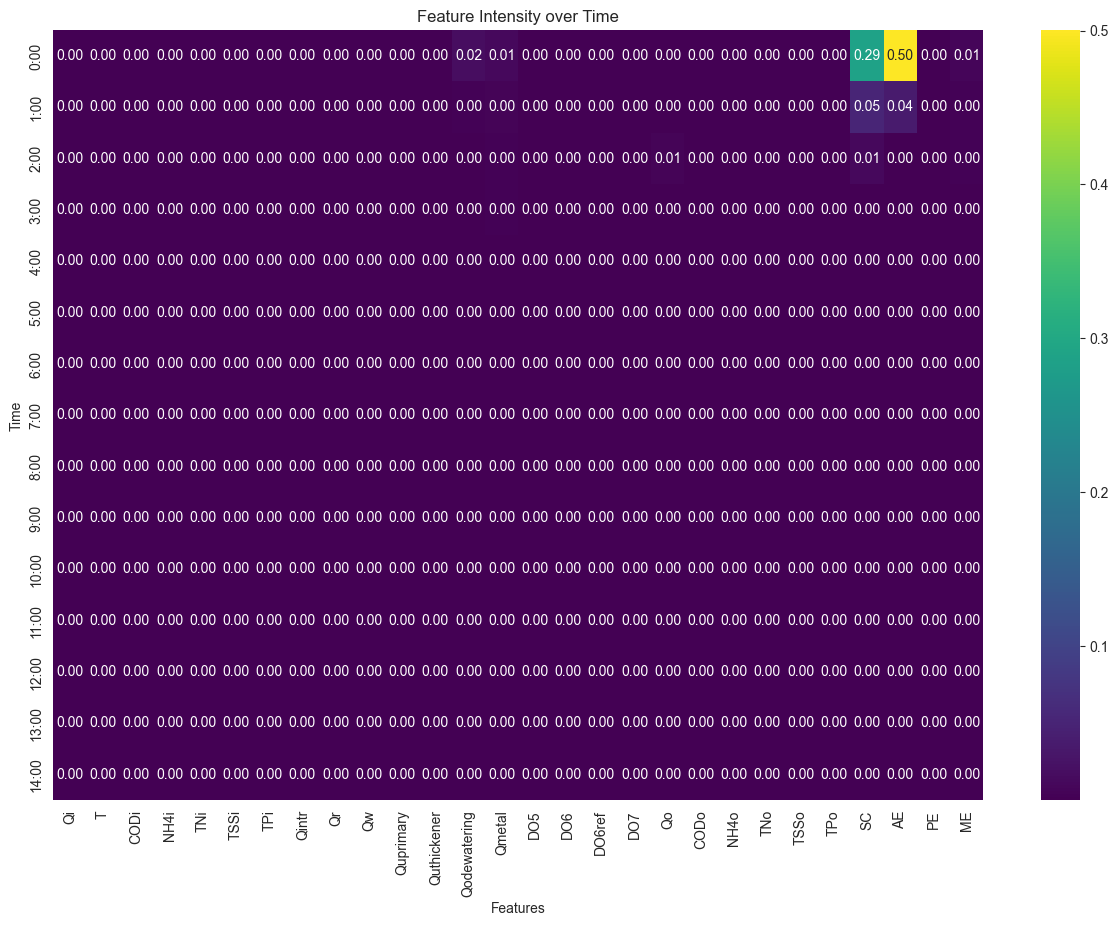

kk 15
Test r2 score: 0.9652823502210168
Test r2_adj score: 0.928599550454544
test rmse: 317.4594777560312


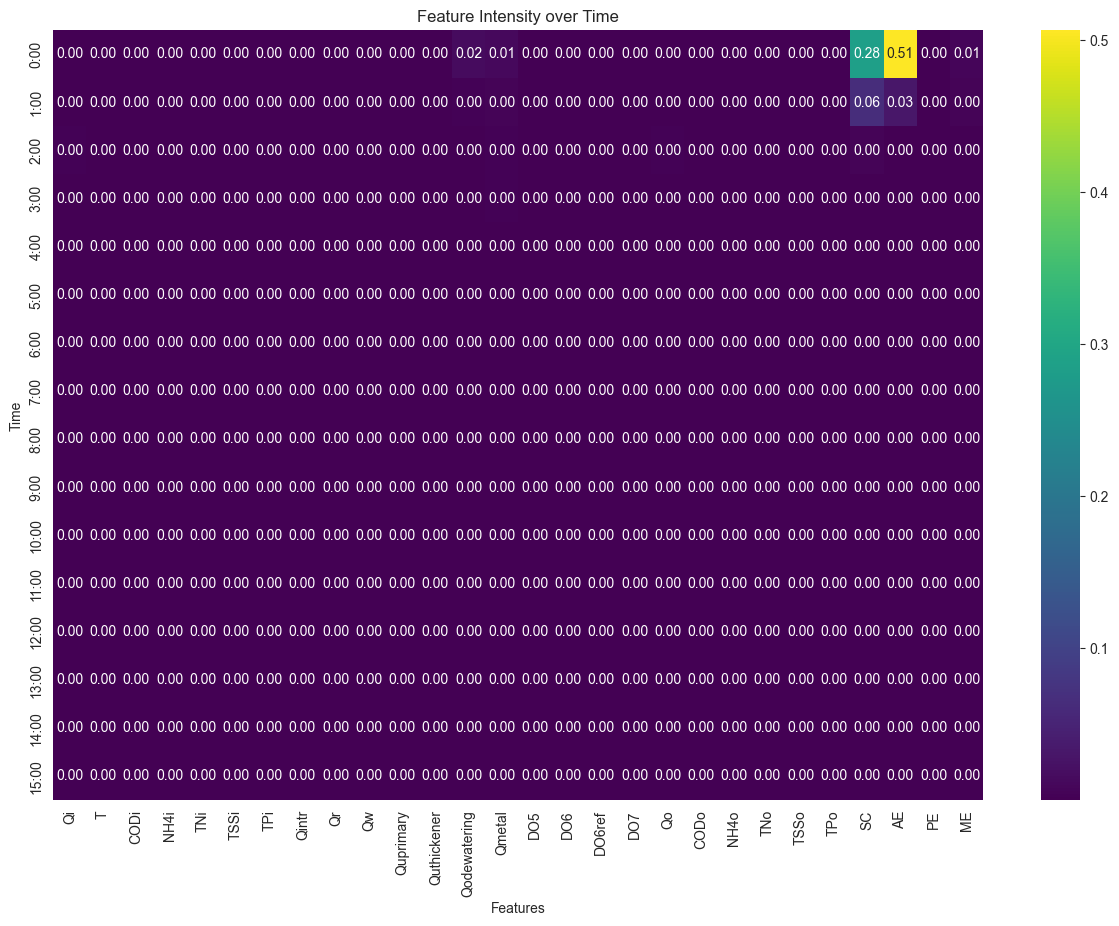

In [177]:
# oci
n_features = 28
for kk in list_hours_shifted:
    df = df_oci[df_oci['kk'] == kk]
    fname_prefix = 'data/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'

    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    list_col_drop = ['EQI', 'OCI']
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])
    y_ = df_delay_16_hours_result['OCI']


    X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)

    model = RandomForestRegressor(n_estimators=df['n_estimators'][0],
                                  max_depth=df['max_depth'][0],
                                  min_samples_split=df['min_samples_split'][0],
                                  max_features=df['max_features'][0],
                                  random_state=42,
                                  n_jobs=-1)
    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    p = len(X_test.columns)
    r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

    if r2_adj > best_adj_r2:
        best_adj_r2 = r2_adj
        best_delay = kk

    print(f"kk {kk}")
    print(f"Test r2 score: {r2}")
    print(f"Test r2_adj score: {r2_adj}")
    print(f"test rmse: {rmse}")
    importances = model.feature_importances_
    
    # Generate some example data
    # Replace this with your actual data
    np.random.seed(0)
    data = importances.reshape(int(kk)+1, 28)
    # apply log scale?
    #data = np.log(importances).reshape(int(kk)+1, 28) 

    # Create time and feature labels for the axes
    time_labels = [f"{i}:00" for i in range(data.shape[0])]
    feature_labels = [f"{feature}" for feature in X_train.columns[:n_features]]

    # Create the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(data, annot=True, fmt=".2f", xticklabels=feature_labels, yticklabels=time_labels, cmap="viridis")

    # Adding titles and labels
    plt.title("Feature Intensity over Time")
    plt.xlabel("Features")
    plt.ylabel("Time")

    # Show the plot
    plt.show()